# Programming Assignment 5 - Support Vector Machines 
In this programming assignment, you would use Support Vector Machines and Logistic Regression
for a classification problem. We are going to compare performance of both the algorithms on the same dataset with different values of parameters like type of kernel used, type of regularization techniques used (ridge/lasso) etc.

Do the assignment carefully, by understanding the structure of the code.

# Instructions :
You have to write a small report in a pdf file. You can use bullet points to discuss your results for every function of the assignment.<br>
For example, for data1.csv dataset, write which method gave you the best accuracy using which value of the parameter.<br>
Do not write explainations, just discuss your results / observations point to point. 


In [855]:
# Importing the libraries to be used:
import numpy as np
from numpy import random as r
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, r2_score

In [856]:
def transform_and_split_data(data):
    X = data[:, :-1]
    y = data[:, -1]
    print(f'Original y hist: {np.histogram(y, range(int(y.max()) + 1))}')
    y = y - data[:, -1].min()
    y[y<=2] = 0.
    y[y==3] = 1.
    y[y>3] = 2.
    print(f'Current y hist: {np.histogram(y, [-0.5, 0.5, 1.5, 2.5])}')
    print(f'y min: {y.min()}, y max: {y.max()}')
    y_out_len = int(y.max()) + 1

    print(f'The shape of the wines dataset: {data.shape}')
    print(f'y[:10]:\n{y[:10]}')
    print(f'X[:10, :]:\n{X[:10, :]}')

    # Scale the dataset
    X_scale = StandardScaler()
    X = X_scale.fit_transform(X)
    print(print(f'ScaledX[:10, :]:\n{X[:10, :]}')) # Looking the new features after scaling

    #Split the data into training and test set.  60% training and %40 test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


    return X_train, y_train, X_test, y_test

In [857]:
def confusion_and_classification(y, y_hat):
    cm = confusion_matrix(y, y_hat, normalize='true')

    # Plot non-normalized confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='winter')
    plt.show()

    cr = classification_report(y, y_hat, zero_division=0)
    # accuracy
    print(cr[: cr.find('accuracy') - 6])
    print(f'\t\t R2 Score: {r2_score(y, y_hat)}\n')

# Support Vector Machines (SVM)
Now we will use the same dataset and try to find a classifier using SVM.
For more information about svm classifier, check the given link.
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# SVM using Linear Kernel.

In [858]:
from sklearn import svm

# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear):
    # TODO - Create an object of svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear = svm.SVC(probability=False, kernel='linear', C=c)
    
    # Fit the classifier on the training set
    svc_linear.fit(X_train, y_train)

    acc_train = svc_linear.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print(f'SVM - Linear, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_linear_train)

    acc_test = svc_linear.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_linear_test)

# SVM using Radial Basis Function(RBF) Kernel.

In [859]:
# Complete the function below:
# In this function and next 2 functions, we are not passing the data matrices as parameters 
# because we can use global variables inside the functions.
def svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf):
    # Create an object of svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, random_state=24)
    
    # Fit the classifier on the training set
    svc_rbf.fit(X_train, y_train)

    acc_train = svc_rbf.score(X_train, y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_rbf.append(acc_train)
    print(f'SVM - RBF, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_rbf_train)

    acc_test = svc_rbf.score(X_test, y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_rbf.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_rbf_test)

# SVM using Polynomial Kernel.
Note: SVM with polynomial kernel can be sometimes very slow. If that is the case, use smaller size of training set. Instead of all 600 training examples, use less (say 300).

In [860]:
def svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly):
    # Create an object of svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    # Fit the classifier on the training set
    # Use A and B to train and C and D to test.
    svc_polynomial.fit(X_train, y_train)

    acc_train = svc_polynomial.score(X_train, y_train)
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_poly.append(acc_train)
    print(f'SVM - Poly, Train Accuracy = {acc_train}, C={c}')

    # Find the prediction and accuracy on the training set
    Yhat_svc_poly_train = svc_polynomial.predict(X_train)
    # confusion_and_classification(y_train, Yhat_svc_poly_train)

    acc_test = svc_polynomial.score(X_test, y_test)
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_poly.append(acc_test)
    print(f'Test Accuracy = {acc_test}')

    # Find the prediction and accuracy on the test set
    Yhat_svc_poly_test = svc_polynomial.predict(X_test)
    confusion_and_classification(y_test, Yhat_svc_poly_test)

In [861]:
def train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly):
    # Linear
    acc_train_svm_linear = []
    acc_test_svm_linear = []
    # Call the above function i.e. logreg_model with different values of parameter 'c'.
    # c_svm_linear = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    for c in c_svm_linear:
        svm_linear(c, X_train, y_train, X_test, y_test, acc_train_svm_linear, acc_test_svm_linear)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_linear, acc_train_svm_linear, color='red', label='Training Accuracy')
    plt.plot(c_svm_linear, acc_test_svm_linear, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Linear - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Radial Basis Function
    acc_train_svm_rbf = []
    acc_test_svm_rbf = []
    # c_svm_rbf = [0.1, 1, 10, 100, 1000]
    for c in c_svm_rbf:
        svm_rbf(c, X_train, y_train, X_test, y_test, acc_train_svm_rbf, acc_test_svm_rbf)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_rbf, acc_train_svm_rbf, color='red', label='Training Accuracy')
    plt.plot(c_svm_rbf, acc_test_svm_rbf, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('RBF - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



    # # Poly
    acc_train_svm_poly = []
    acc_test_svm_poly = []
    # c_svm_poly = [0.1, 1, 10, 100, 1000]
    for c in c_svm_poly:
        svm_polynomial(c, X_train, y_train, X_test, y_test, acc_train_svm_poly, acc_test_svm_poly)

    # Plot training accuracy(Y-axis) v/s 'c' on X - Axis.
    # Plot test accuracy(Y-Axis) v/s 'c' on X - Axis.
    plt.plot(c_svm_poly, acc_train_svm_poly, color='red', label='Training Accuracy')
    plt.plot(c_svm_poly, acc_test_svm_poly, color='green', label='Test Accuracy')
    plt.xlabel('c')
    plt.ylabel('accuracy')
    plt.title('Poly - Training and Test accuracy v/s c')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [862]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
data_red = df_red.to_numpy()

df_white = pd.read_csv('winequality-white.csv', sep=';')
data_white = df_white.to_numpy()

data_all = np.vstack((data_red, data_white))

rs = r.RandomState(42)
r.shuffle(data_red)
r.shuffle(data_white)
r.shuffle(data_all)

# Train Red Wines Data

In [863]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[0. 1. 1. 1. 0. 0. 0. 1. 1. 2.]
X[:10, :]:
[[7.50000000e+00 5.00000000e-01 3.60000000e-01 6.10000000e+00
  7.10000000e-02 1.70000000e+01 1.02000000e+02 9.97800000e-01
  3.35000000e+00 8.00000000e-01 1.05000000e+01]
 [9.40000000e+00 3.30000000e-01 5.90000000e-01 2.80000000e+00
  7.90000000e-02 9.00000000e+00 3.00000000e+01 9.97600000e-01
  3.12000000e+00 5.40000000e-01 1.20000000e+01]
 [9.00000000e+00 8.00000000e-01 1.20000000e-01 2.40000000e+00
  8.30000000e-02 8.00000000e+00 2.80000000e+01 9.98360000e-01
  3.33000000e+00 6.50000000e-01 1.04000000e+01]
 [7.40000000e+00 7.85000000e-01 1.90000000e-01 5.20000000e+00
  9.40000000e-02 1.90000000e+01 9.80000000e+01 9.97130000e-01
  3.16000000e+00 5.20000000e-01 9.56666667e+00]
 [8.40000000e+00 6

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.06
Test Accuracy = 0.61875


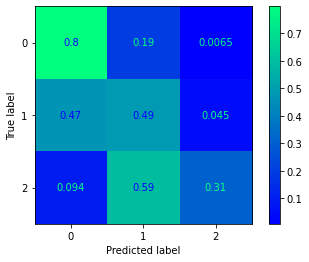

              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72       154
         1.0       0.57      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.039340442691997546

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.062368559648186196
Test Accuracy = 0.61875


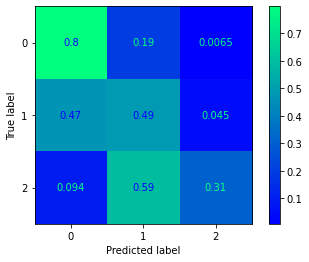

              precision    recall  f1-score   support

         0.0       0.65      0.80      0.72       154
         1.0       0.57      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.039340442691997546

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.064830620543156
Test Accuracy = 0.6125


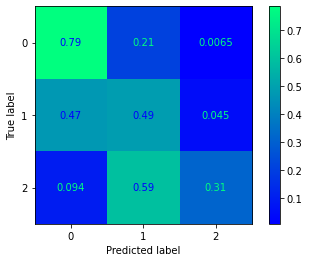

              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.06738987373957916
Test Accuracy = 0.6125


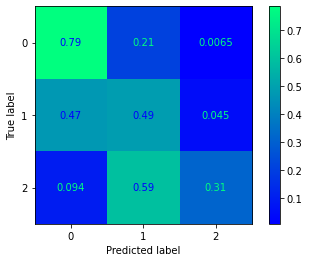

              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.070050156000178
Test Accuracy = 0.6125


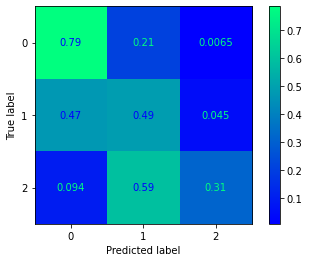

              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.0728154555476975
Test Accuracy = 0.609375


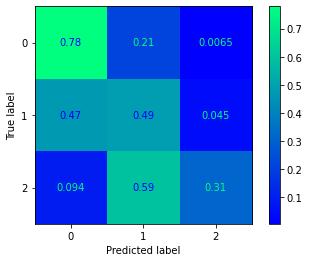

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.07568991804394033
Test Accuracy = 0.609375


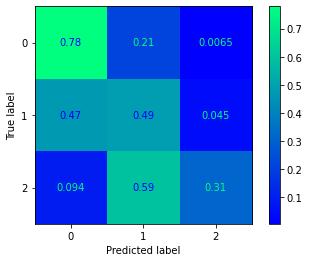

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.07867785280483029
Test Accuracy = 0.609375


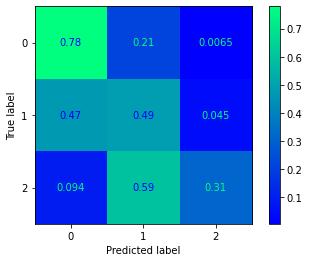

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.08178373926082119
Test Accuracy = 0.609375


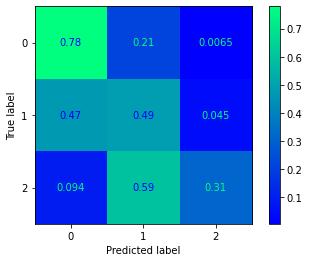

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.08501223367233723
Test Accuracy = 0.609375


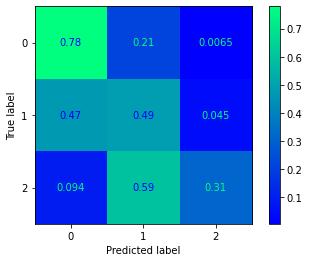

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.08836817611031181
Test Accuracy = 0.609375


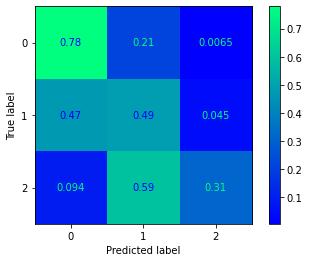

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.09185659771229007
Test Accuracy = 0.609375


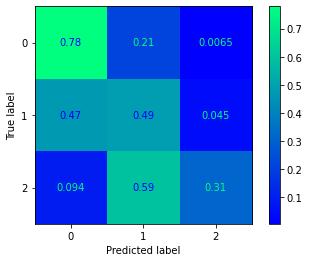

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.09548272822497346
Test Accuracy = 0.609375


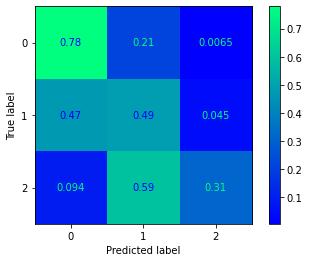

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.09925200384451348
Test Accuracy = 0.609375


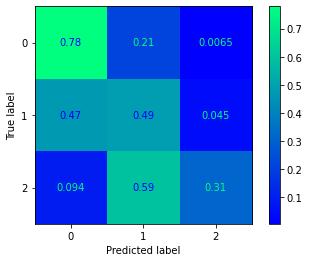

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.49      0.52       134
         2.0       0.59      0.31      0.41        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.10317007536630908
Test Accuracy = 0.615625


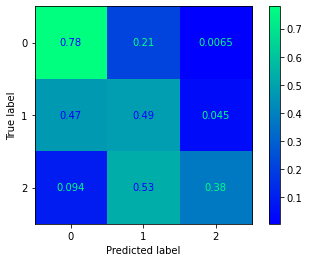

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.57      0.49      0.52       134
         2.0       0.63      0.38      0.47        32
		 R2 Score: 0.03217134151805723

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.10724281665652523
Test Accuracy = 0.615625


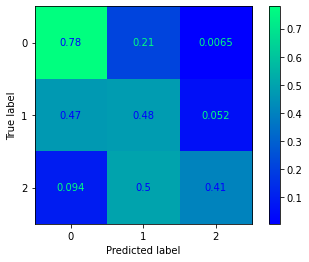

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.57      0.48      0.52       134
         2.0       0.62      0.41      0.49        32
		 R2 Score: 0.03217134151805723

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.11147633345803316
Test Accuracy = 0.615625


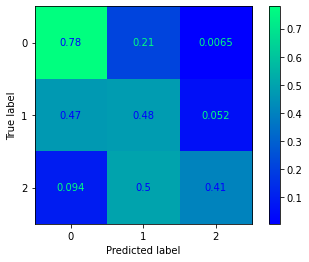

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.57      0.48      0.52       134
         2.0       0.62      0.41      0.49        32
		 R2 Score: 0.03217134151805723

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.11587697254397394
Test Accuracy = 0.6125


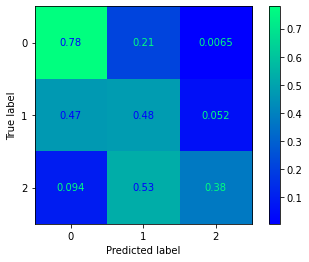

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.12045133123266785
Test Accuracy = 0.6125


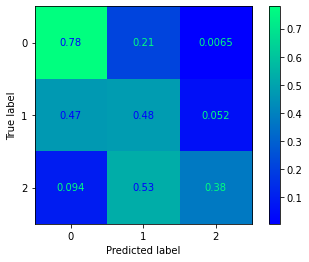

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.12520626727813464
Test Accuracy = 0.6125


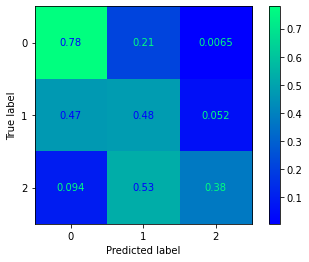

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.1301489091510514
Test Accuracy = 0.6125


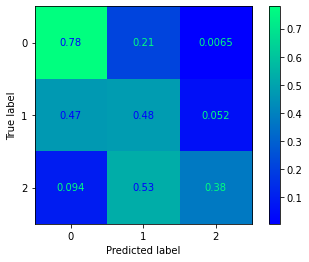

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.1352866667255619
Test Accuracy = 0.6125


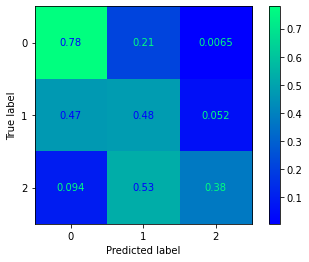

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.14062724238795823
Test Accuracy = 0.6125


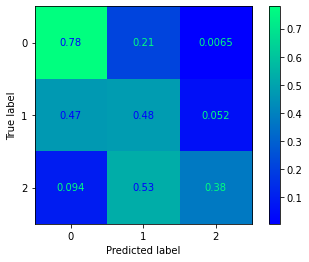

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.14617864258388852
Test Accuracy = 0.6125


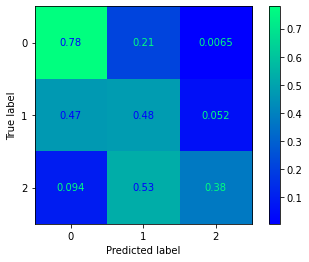

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.15194918982140238
Test Accuracy = 0.6125


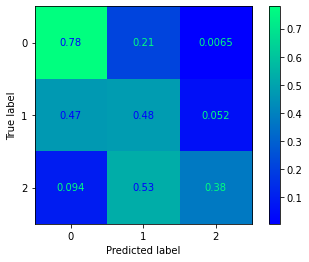

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.15794753514782836
Test Accuracy = 0.6125


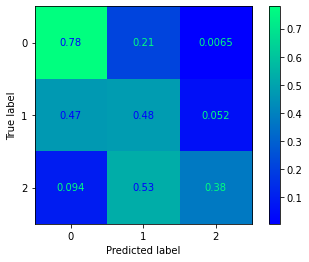

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.16418267111918863
Test Accuracy = 0.6125


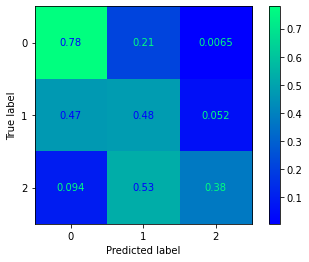

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       154
         1.0       0.56      0.48      0.52       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.17066394528159423
Test Accuracy = 0.609375


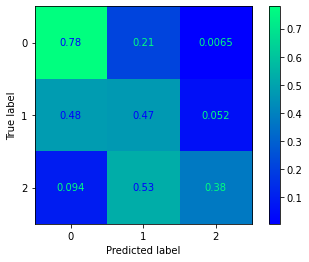

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6333072713057076, C=0.17740107418483161
Test Accuracy = 0.609375


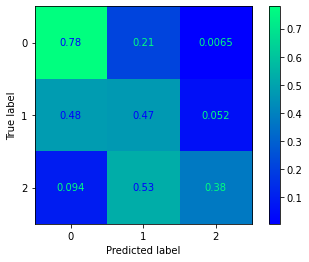

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.18440415794914958
Test Accuracy = 0.609375


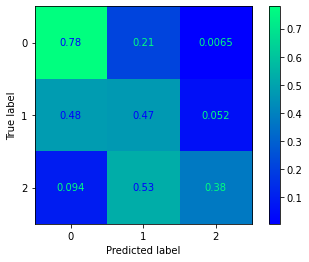

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.1916836954070847
Test Accuracy = 0.609375


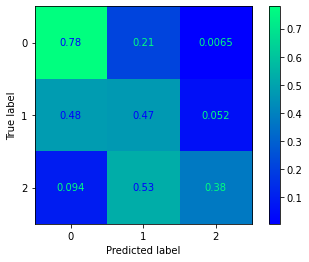

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.19925059984302526
Test Accuracy = 0.609375


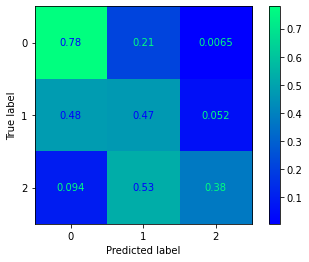

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6333072713057076, C=0.20711621535411
Test Accuracy = 0.609375


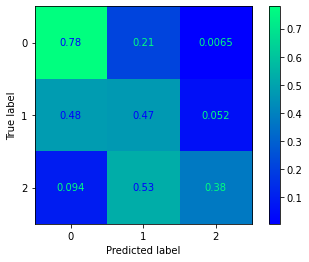

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.21529233385698981
Test Accuracy = 0.609375


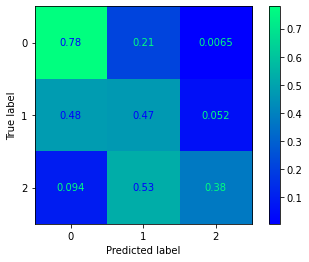

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.2237912127659481
Test Accuracy = 0.609375


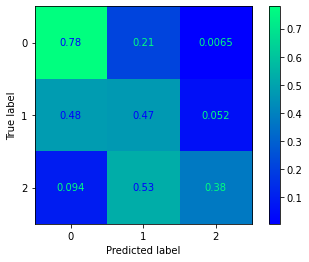

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.23262559336888272
Test Accuracy = 0.609375


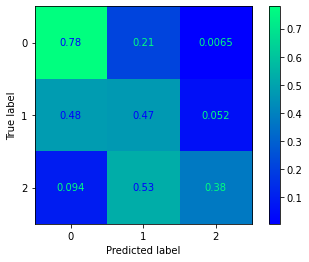

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.47      0.51       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.017833139170176593

SVM - Linear, Train Accuracy = 0.6387802971071149, C=0.24180871992869776
Test Accuracy = 0.615625


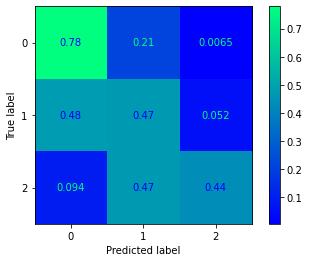

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.57      0.47      0.51       134
         2.0       0.64      0.44      0.52        32
		 R2 Score: 0.03217134151805723

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.2513543595387423
Test Accuracy = 0.6125


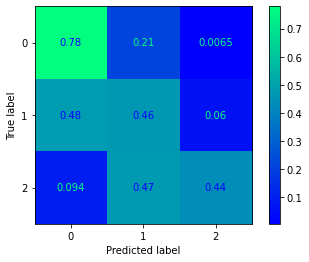

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.46      0.51       134
         2.0       0.61      0.44      0.51        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.2612768227620615
Test Accuracy = 0.615625


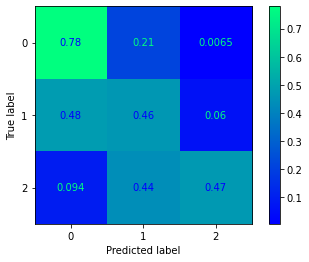

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.57      0.46      0.51       134
         2.0       0.62      0.47      0.54        32
		 R2 Score: 0.03217134151805723

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.2715909850854034
Test Accuracy = 0.615625


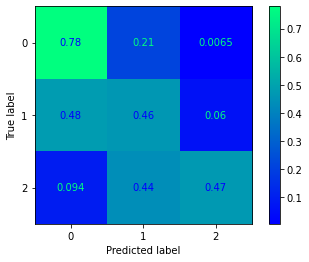

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.57      0.46      0.51       134
         2.0       0.62      0.47      0.54        32
		 R2 Score: 0.03217134151805723

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.28231230922014383
Test Accuracy = 0.6125


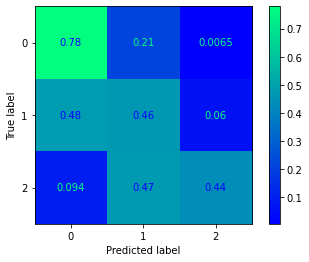

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.46      0.51       134
         2.0       0.61      0.44      0.51        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.2934568682835621
Test Accuracy = 0.6125


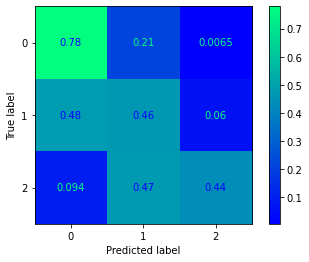

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.46      0.51       134
         2.0       0.61      0.44      0.51        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.305041369895221
Test Accuracy = 0.6125


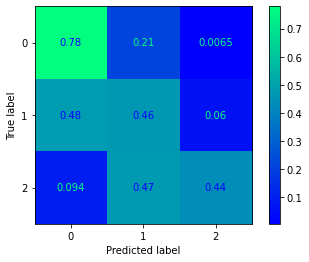

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.46      0.51       134
         2.0       0.61      0.44      0.51        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.31708318122457535
Test Accuracy = 0.6125


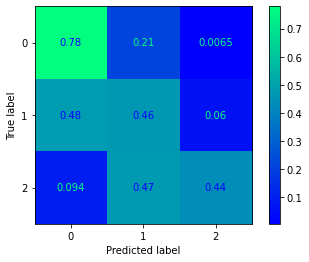

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.46      0.51       134
         2.0       0.61      0.44      0.51        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.32960035502735935
Test Accuracy = 0.6125


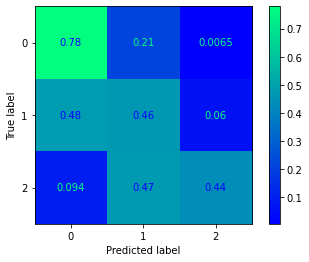

              precision    recall  f1-score   support

         0.0       0.64      0.78      0.70       154
         1.0       0.56      0.46      0.51       134
         2.0       0.61      0.44      0.51        32
		 R2 Score: 0.02500224034411691

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.3426116567097868
Test Accuracy = 0.615625


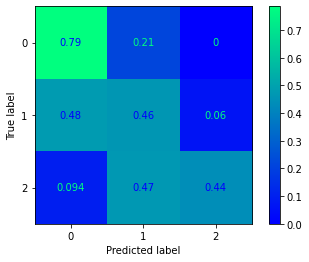

              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71       154
         1.0       0.56      0.46      0.51       134
         2.0       0.64      0.44      0.52        32
		 R2 Score: 0.05367864503987818

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.3561365924611372
Test Accuracy = 0.615625


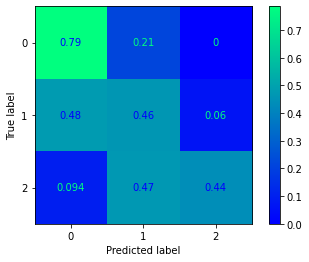

              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71       154
         1.0       0.56      0.46      0.51       134
         2.0       0.64      0.44      0.52        32
		 R2 Score: 0.05367864503987818

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.3701954384969036
Test Accuracy = 0.615625


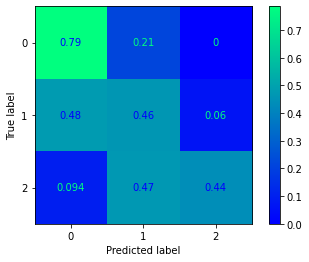

              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71       154
         1.0       0.56      0.46      0.51       134
         2.0       0.64      0.44      0.52        32
		 R2 Score: 0.05367864503987818

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.38480927145634286
Test Accuracy = 0.615625


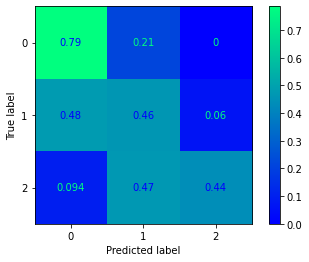

              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71       154
         1.0       0.56      0.46      0.51       134
         2.0       0.64      0.44      0.52        32
		 R2 Score: 0.05367864503987818

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.4
Test Accuracy = 0.615625


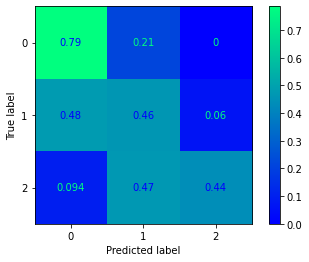

              precision    recall  f1-score   support

         0.0       0.64      0.79      0.71       154
         1.0       0.56      0.46      0.51       134
         2.0       0.64      0.44      0.52        32
		 R2 Score: 0.05367864503987818



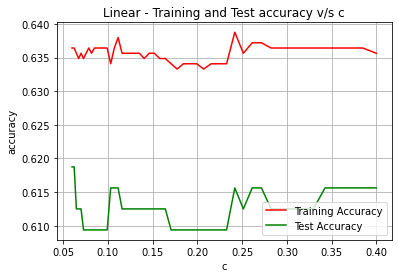

SVM - RBF, Train Accuracy = 0.7021110242376857, C=1.0
Test Accuracy = 0.6625


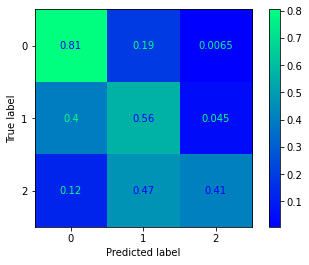

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.74       154
         1.0       0.63      0.56      0.59       134
         2.0       0.65      0.41      0.50        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7036747458952306, C=1.0660813944804757
Test Accuracy = 0.6625


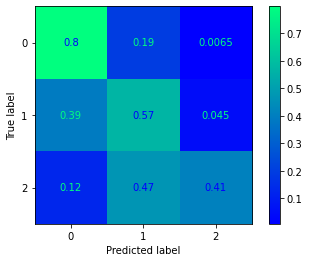

              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74       154
         1.0       0.63      0.57      0.60       134
         2.0       0.65      0.41      0.50        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7075840500390931, C=1.1365295396574355
Test Accuracy = 0.66875


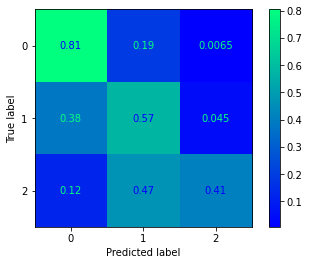

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.74       154
         1.0       0.64      0.57      0.60       134
         2.0       0.65      0.41      0.50        32
		 R2 Score: 0.13253875795322168

SVM - RBF, Train Accuracy = 0.7114933541829555, C=1.211632996506252
Test Accuracy = 0.671875


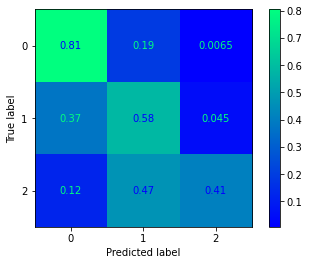

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.64      0.58      0.61       134
         2.0       0.65      0.41      0.50        32
		 R2 Score: 0.139707859127162

SVM - RBF, Train Accuracy = 0.7130570758405004, C=1.2916993945139426
Test Accuracy = 0.671875


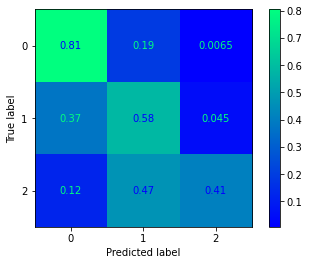

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.64      0.58      0.61       134
         2.0       0.65      0.41      0.50        32
		 R2 Score: 0.139707859127162

SVM - RBF, Train Accuracy = 0.7138389366692729, C=1.3770566917530098
Test Accuracy = 0.675


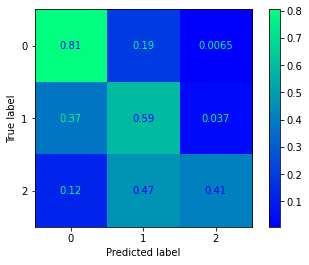

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.64      0.59      0.61       134
         2.0       0.68      0.41      0.51        32
		 R2 Score: 0.1468769603011023

SVM - RBF, Train Accuracy = 0.7154026583268178, C=1.4680545182227194
Test Accuracy = 0.671875


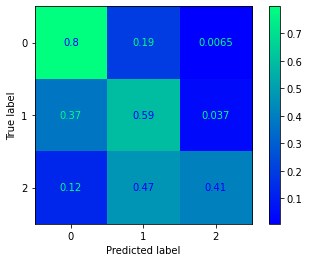

              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74       154
         1.0       0.64      0.59      0.61       134
         2.0       0.68      0.41      0.51        32
		 R2 Score: 0.139707859127162

SVM - RBF, Train Accuracy = 0.7177482408131353, C=1.5650656079602396
Test Accuracy = 0.671875


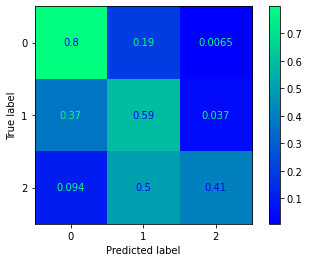

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       154
         1.0       0.63      0.59      0.61       134
         2.0       0.68      0.41      0.51        32
		 R2 Score: 0.16121516264898295

SVM - RBF, Train Accuracy = 0.7247849882720876, C=1.6684873257876855
Test Accuracy = 0.66875


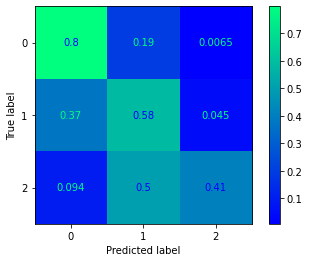

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       154
         1.0       0.63      0.58      0.60       134
         2.0       0.65      0.41      0.50        32
		 R2 Score: 0.15404606147504263

SVM - RBF, Train Accuracy = 0.72556684910086, C=1.7787432949487358
Test Accuracy = 0.659375


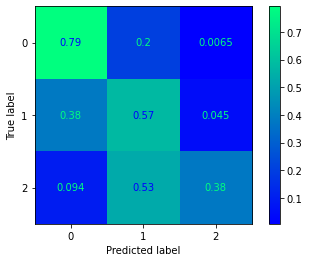

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       154
         1.0       0.62      0.57      0.59       134
         2.0       0.63      0.38      0.47        32
		 R2 Score: 0.13253875795322168

SVM - RBF, Train Accuracy = 0.7302580140734949, C=1.896285132301744
Test Accuracy = 0.653125


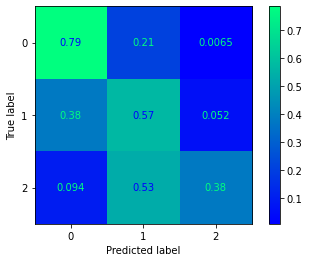

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       154
         1.0       0.61      0.57      0.59       134
         2.0       0.60      0.38      0.46        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7341673182173573, C=2.021594298176837
Test Accuracy = 0.653125


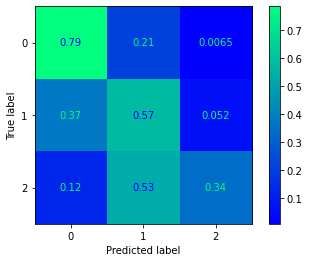

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       154
         1.0       0.61      0.57      0.59       134
         2.0       0.58      0.34      0.43        32
		 R2 Score: 0.09669325208352009

SVM - RBF, Train Accuracy = 0.7388584831899921, C=2.155184068474141
Test Accuracy = 0.653125


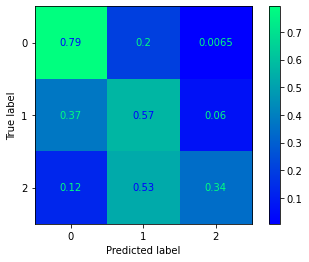

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       154
         1.0       0.61      0.57      0.59       134
         2.0       0.55      0.34      0.42        32
		 R2 Score: 0.09669325208352009

SVM - RBF, Train Accuracy = 0.7419859265050821, C=2.297601637081017
Test Accuracy = 0.6625


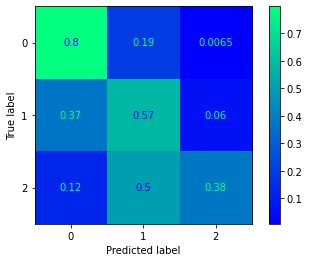

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       154
         1.0       0.63      0.57      0.60       134
         2.0       0.57      0.38      0.45        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.745113369820172, C=2.4494303572199545
Test Accuracy = 0.659375


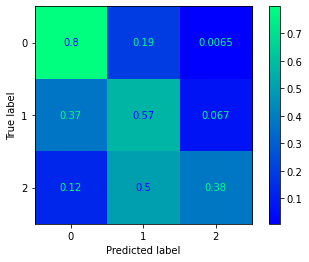

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       154
         1.0       0.62      0.57      0.59       134
         2.0       0.55      0.38      0.44        32
		 R2 Score: 0.11103145443140072

SVM - RBF, Train Accuracy = 0.7505863956215794, C=2.6112921309078585
Test Accuracy = 0.6625


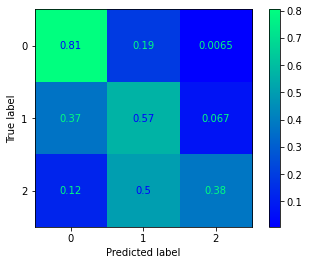

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.63      0.57      0.60       134
         2.0       0.55      0.38      0.44        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7552775605942142, C=2.7838499563141426
Test Accuracy = 0.6625


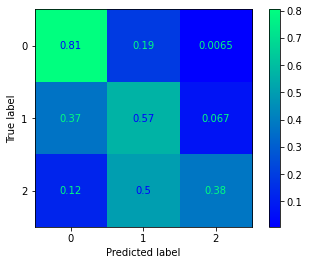

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.63      0.57      0.60       134
         2.0       0.55      0.38      0.44        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7568412822517592, C=2.967810643451793
Test Accuracy = 0.6625


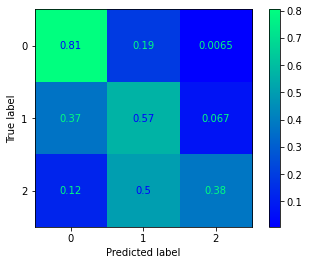

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.63      0.57      0.60       134
         2.0       0.55      0.38      0.44        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7560594214229867, C=3.163927709325085
Test Accuracy = 0.6625


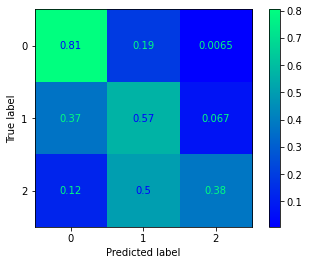

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.63      0.57      0.60       134
         2.0       0.55      0.38      0.44        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7599687255668491, C=3.3730044643927033
Test Accuracy = 0.6625


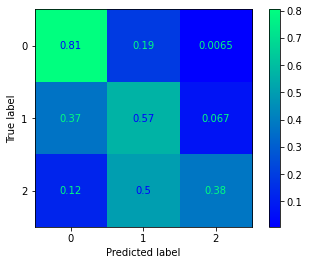

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.63      0.57      0.60       134
         2.0       0.55      0.38      0.44        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7591868647380766, C=3.595897302988643
Test Accuracy = 0.6625


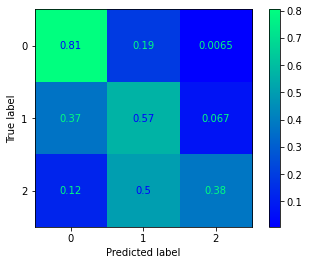

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.63      0.57      0.60       134
         2.0       0.55      0.38      0.44        32
		 R2 Score: 0.11820055560534104

SVM - RBF, Train Accuracy = 0.7591868647380766, C=3.8335192111787144
Test Accuracy = 0.665625


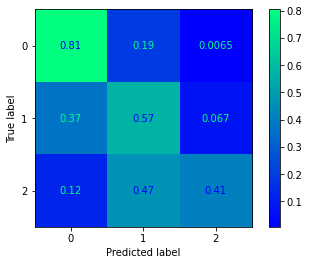

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.63      0.57      0.60       134
         2.0       0.57      0.41      0.47        32
		 R2 Score: 0.12536965677928136

SVM - RBF, Train Accuracy = 0.7623143080531666, C=4.086843506421097
Test Accuracy = 0.671875


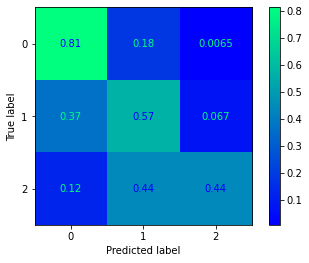

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.64      0.57      0.60       134
         2.0       0.58      0.44      0.50        32
		 R2 Score: 0.139707859127162

SVM - RBF, Train Accuracy = 0.7623143080531666, C=4.35690782434888
Test Accuracy = 0.675


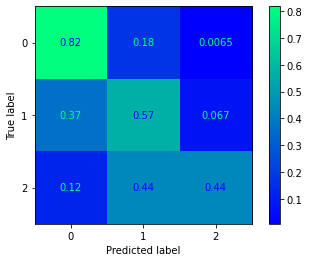

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       154
         1.0       0.65      0.57      0.61       134
         2.0       0.58      0.44      0.50        32
		 R2 Score: 0.1468769603011023

SVM - RBF, Train Accuracy = 0.7693510555121188, C=4.64481836900475
Test Accuracy = 0.678125


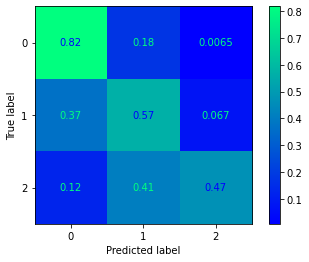

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       154
         1.0       0.66      0.57      0.61       134
         2.0       0.60      0.47      0.53        32
		 R2 Score: 0.15404606147504263

SVM - RBF, Train Accuracy = 0.7693510555121188, C=4.951754443937111
Test Accuracy = 0.678125


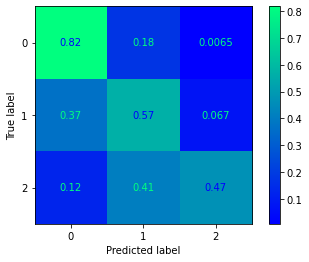

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       154
         1.0       0.66      0.57      0.61       134
         2.0       0.60      0.47      0.53        32
		 R2 Score: 0.15404606147504263

SVM - RBF, Train Accuracy = 0.7724784988272088, C=5.278973282717368
Test Accuracy = 0.678125


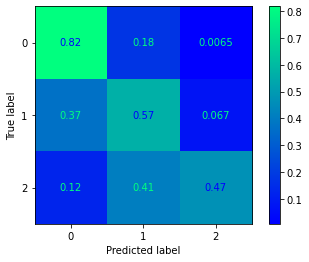

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       154
         1.0       0.66      0.57      0.61       134
         2.0       0.60      0.47      0.53        32
		 R2 Score: 0.15404606147504263

SVM - RBF, Train Accuracy = 0.7732603596559813, C=5.627815198664507
Test Accuracy = 0.678125


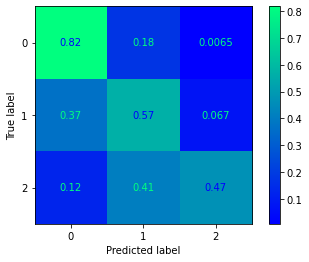

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       154
         1.0       0.66      0.57      0.61       134
         2.0       0.60      0.47      0.53        32
		 R2 Score: 0.15404606147504263

SVM - RBF, Train Accuracy = 0.777951524628616, C=5.999709074870673
Test Accuracy = 0.678125


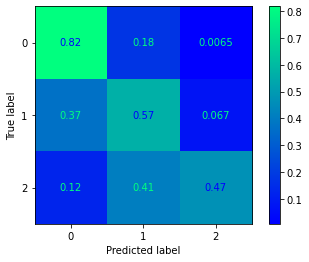

              precision    recall  f1-score   support

         0.0       0.70      0.82      0.76       154
         1.0       0.66      0.57      0.61       134
         2.0       0.60      0.47      0.53        32
		 R2 Score: 0.15404606147504263

SVM - RBF, Train Accuracy = 0.781078967943706, C=6.396178217015292
Test Accuracy = 0.684375


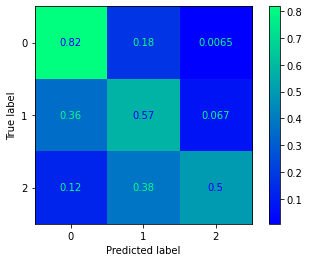

              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76       154
         1.0       0.66      0.57      0.62       134
         2.0       0.62      0.50      0.55        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.7865519937451134, C=6.818846592941304
Test Accuracy = 0.68125


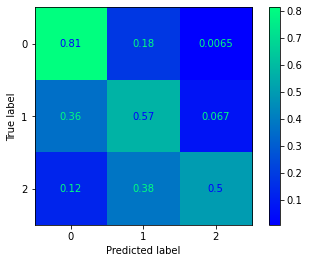

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       154
         1.0       0.66      0.57      0.61       134
         2.0       0.62      0.50      0.55        32
		 R2 Score: 0.16121516264898295

SVM - RBF, Train Accuracy = 0.7896794370602033, C=7.269445484551306
Test Accuracy = 0.684375


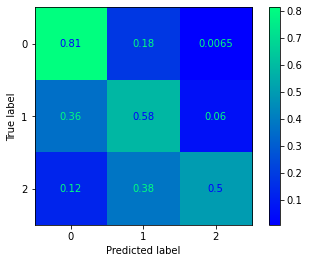

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       154
         1.0       0.66      0.58      0.62       134
         2.0       0.64      0.50      0.56        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.7888975762314308, C=7.749820579270255
Test Accuracy = 0.684375


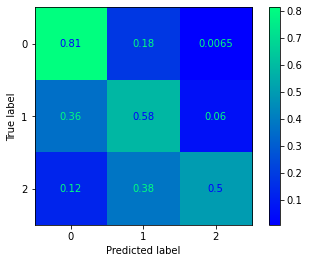

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       154
         1.0       0.66      0.58      0.62       134
         2.0       0.64      0.50      0.56        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.7943706020328382, C=8.261939530121921
Test Accuracy = 0.684375


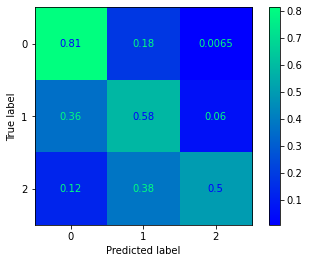

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       154
         1.0       0.66      0.58      0.62       134
         2.0       0.64      0.50      0.56        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.7998436278342455, C=8.807900015385744
Test Accuracy = 0.684375


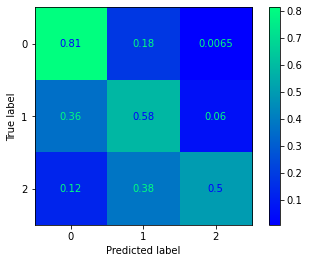

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       154
         1.0       0.66      0.58      0.62       134
         2.0       0.64      0.50      0.56        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.800625488663018, C=9.389938330847036
Test Accuracy = 0.684375


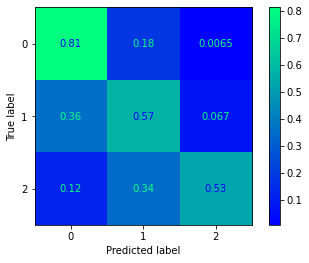

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       154
         1.0       0.66      0.57      0.62       134
         2.0       0.63      0.53      0.58        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.8045347928068803, C=10.010438549835081
Test Accuracy = 0.684375


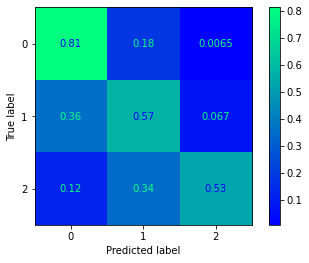

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       154
         1.0       0.66      0.57      0.62       134
         2.0       0.63      0.53      0.58        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.8068803752931978, C=10.67194228856929
Test Accuracy = 0.68125


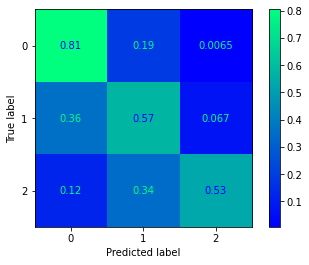

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.66      0.57      0.61       134
         2.0       0.63      0.53      0.58        32
		 R2 Score: 0.16121516264898295

SVM - RBF, Train Accuracy = 0.8084440969507428, C=11.377159116813106
Test Accuracy = 0.675


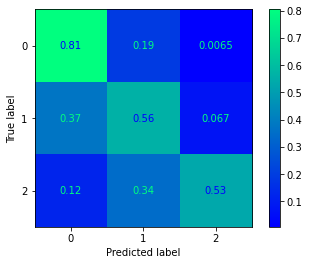

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.65      0.56      0.60       134
         2.0       0.63      0.53      0.58        32
		 R2 Score: 0.1468769603011023

SVM - RBF, Train Accuracy = 0.8100078186082877, C=12.128977656478376
Test Accuracy = 0.675


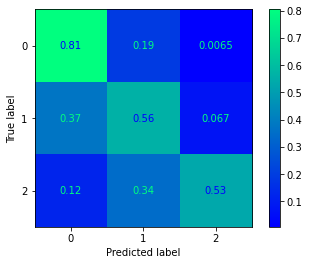

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       154
         1.0       0.65      0.56      0.60       134
         2.0       0.63      0.53      0.58        32
		 R2 Score: 0.1468769603011023

SVM - RBF, Train Accuracy = 0.8139171227521501, C=12.930477413640999
Test Accuracy = 0.675


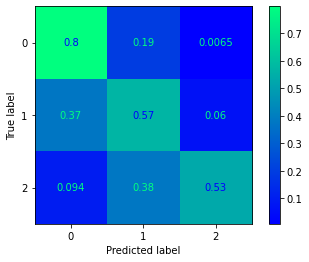

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       154
         1.0       0.64      0.57      0.60       134
         2.0       0.65      0.53      0.59        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.815480844409695, C=13.784941392432694
Test Accuracy = 0.675


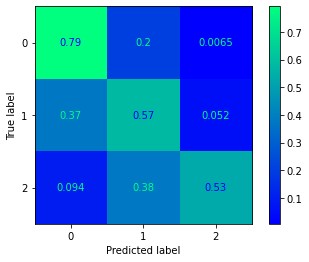

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       154
         1.0       0.64      0.57      0.61       134
         2.0       0.68      0.53      0.60        32
		 R2 Score: 0.16838426382292326

SVM - RBF, Train Accuracy = 0.8162627052384676, C=14.695869542476274
Test Accuracy = 0.671875


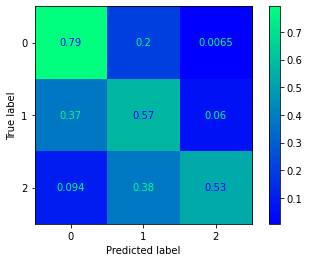

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       154
         1.0       0.64      0.57      0.60       134
         2.0       0.65      0.53      0.59        32
		 R2 Score: 0.16121516264898295

SVM - RBF, Train Accuracy = 0.8193901485535575, C=15.666993094946251
Test Accuracy = 0.678125


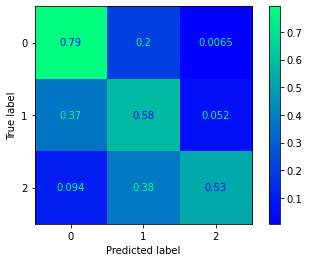

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       154
         1.0       0.64      0.58      0.61       134
         2.0       0.68      0.53      0.60        32
		 R2 Score: 0.17555336499686358

SVM - RBF, Train Accuracy = 0.8232994526974199, C=16.70228984597629
Test Accuracy = 0.68125


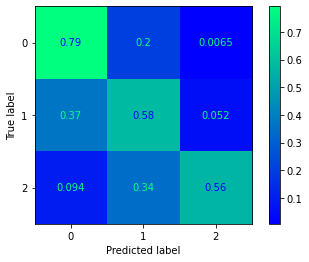

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       154
         1.0       0.65      0.58      0.61       134
         2.0       0.69      0.56      0.62        32
		 R2 Score: 0.1827224661708039

SVM - RBF, Train Accuracy = 0.8303362001563722, C=17.80600045001549
Test Accuracy = 0.684375


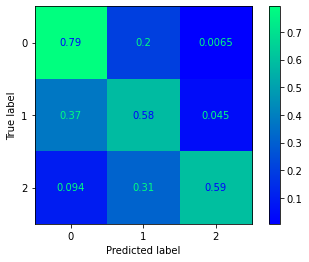

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       154
         1.0       0.66      0.58      0.62       134
         2.0       0.73      0.59      0.66        32
		 R2 Score: 0.18989156734474422

SVM - RBF, Train Accuracy = 0.835027365129007, C=18.982645789872496
Test Accuracy = 0.68125


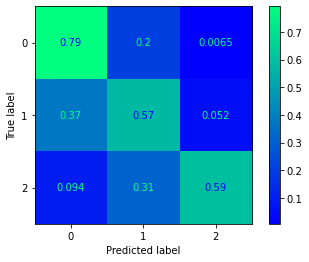

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       154
         1.0       0.65      0.57      0.61       134
         2.0       0.70      0.59      0.64        32
		 R2 Score: 0.1827224661708039

SVM - RBF, Train Accuracy = 0.8405003909304144, C=20.237045494596195
Test Accuracy = 0.684375


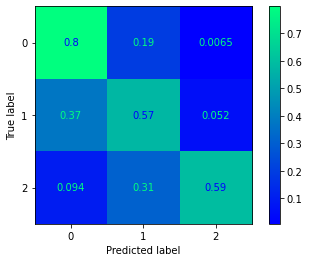

              precision    recall  f1-score   support

         0.0       0.70      0.80      0.75       154
         1.0       0.66      0.57      0.61       134
         2.0       0.70      0.59      0.64        32
		 R2 Score: 0.18989156734474422

SVM - RBF, Train Accuracy = 0.8459734167318217, C=21.574337681043946
Test Accuracy = 0.696875


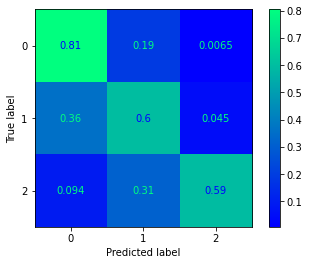

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.75       154
         1.0       0.67      0.60      0.63       134
         2.0       0.73      0.59      0.66        32
		 R2 Score: 0.2185679720405055

SVM - RBF, Train Accuracy = 0.8506645817044566, C=23.0
Test Accuracy = 0.703125


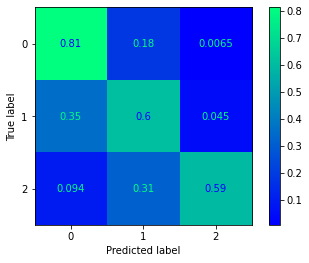

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       154
         1.0       0.68      0.60      0.64       134
         2.0       0.73      0.59      0.66        32
		 R2 Score: 0.23290617438838612



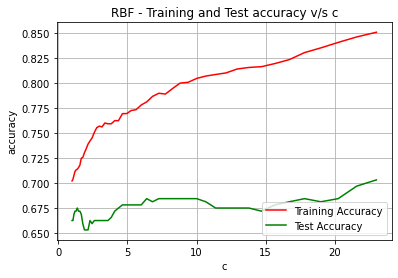

SVM - Poly, Train Accuracy = 0.5934323690383112, C=0.1
Test Accuracy = 0.553125


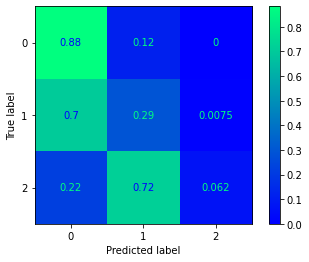

              precision    recall  f1-score   support

         0.0       0.57      0.88      0.70       154
         1.0       0.49      0.29      0.36       134
         2.0       0.67      0.06      0.11        32
		 R2 Score: -0.17573259252621187

SVM - Poly, Train Accuracy = 0.599687255668491, C=0.11352225791695505
Test Accuracy = 0.546875


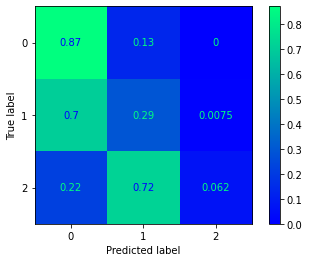

              precision    recall  f1-score   support

         0.0       0.57      0.87      0.69       154
         1.0       0.48      0.29      0.36       134
         2.0       0.67      0.06      0.11        32
		 R2 Score: -0.1900707948740925

SVM - Poly, Train Accuracy = 0.6059421422986708, C=0.12887303042563664
Test Accuracy = 0.54375


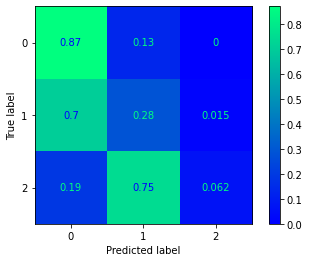

              precision    recall  f1-score   support

         0.0       0.57      0.87      0.69       154
         1.0       0.46      0.28      0.35       134
         2.0       0.50      0.06      0.11        32
		 R2 Score: -0.17573259252621187

SVM - Poly, Train Accuracy = 0.6168881939014855, C=0.1462995739851872
Test Accuracy = 0.546875


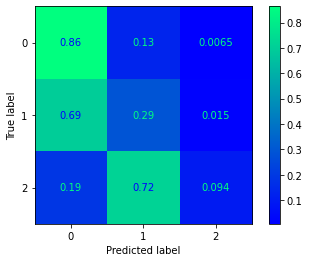

              precision    recall  f1-score   support

         0.0       0.57      0.86      0.69       154
         1.0       0.48      0.29      0.36       134
         2.0       0.50      0.09      0.16        32
		 R2 Score: -0.1900707948740925

SVM - Poly, Train Accuracy = 0.6270523846755277, C=0.16608257971087073
Test Accuracy = 0.55625


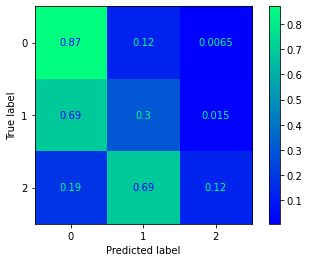

              precision    recall  f1-score   support

         0.0       0.58      0.87      0.69       154
         1.0       0.49      0.30      0.37       134
         2.0       0.57      0.12      0.21        32
		 R2 Score: -0.16856349135227156

SVM - Poly, Train Accuracy = 0.6333072713057076, C=0.18854069449450714
Test Accuracy = 0.5625


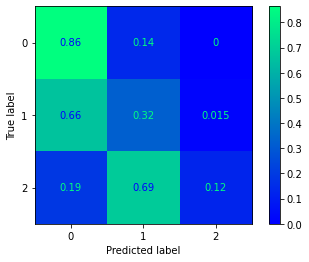

              precision    recall  f1-score   support

         0.0       0.58      0.86      0.70       154
         1.0       0.50      0.32      0.39       134
         2.0       0.67      0.12      0.21        32
		 R2 Score: -0.13271798548256997

SVM - Poly, Train Accuracy = 0.6387802971071149, C=0.21403565348247267
Test Accuracy = 0.5625


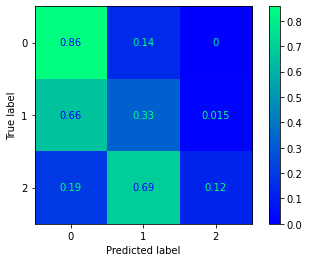

              precision    recall  f1-score   support

         0.0       0.58      0.86      0.69       154
         1.0       0.50      0.33      0.40       134
         2.0       0.67      0.12      0.21        32
		 R2 Score: -0.13271798548256997

SVM - Poly, Train Accuracy = 0.6419077404222049, C=0.24297810658061286
Test Accuracy = 0.56875


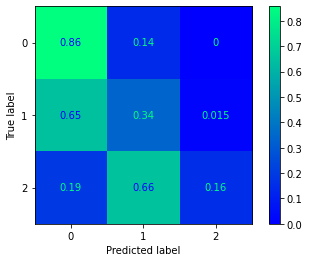

              precision    recall  f1-score   support

         0.0       0.59      0.86      0.70       154
         1.0       0.51      0.34      0.41       134
         2.0       0.71      0.16      0.26        32
		 R2 Score: -0.11837978313468933

SVM - Poly, Train Accuracy = 0.6458170445660673, C=0.2758342328341773
Test Accuracy = 0.575


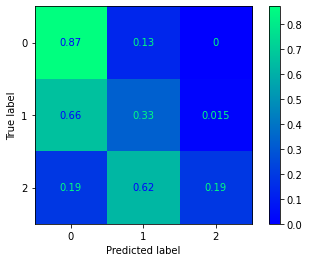

              precision    recall  f1-score   support

         0.0       0.59      0.87      0.70       154
         1.0       0.52      0.33      0.40       134
         2.0       0.75      0.19      0.30        32
		 R2 Score: -0.1040415807868087

SVM - Poly, Train Accuracy = 0.6575449569976545, C=0.31313324922126906
Test Accuracy = 0.584375


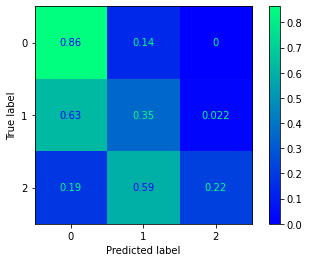

              precision    recall  f1-score   support

         0.0       0.60      0.86      0.71       154
         1.0       0.54      0.35      0.43       134
         2.0       0.70      0.22      0.33        32
		 R2 Score: -0.08253427726498774

SVM - Poly, Train Accuracy = 0.6661454261141517, C=0.35547593480471074
Test Accuracy = 0.5875


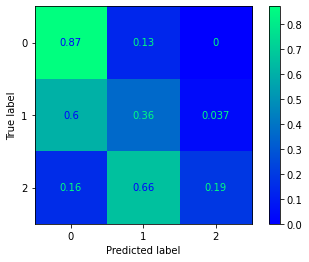

              precision    recall  f1-score   support

         0.0       0.61      0.87      0.72       154
         1.0       0.54      0.36      0.43       134
         2.0       0.55      0.19      0.28        32
		 R2 Score: -0.05385787256922647

SVM - Poly, Train Accuracy = 0.6684910086004691, C=0.4035443075417107
Test Accuracy = 0.590625


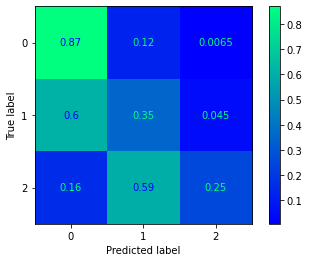

              precision    recall  f1-score   support

         0.0       0.61      0.87      0.72       154
         1.0       0.55      0.35      0.43       134
         2.0       0.53      0.25      0.34        32
		 R2 Score: -0.06819607491710711

SVM - Poly, Train Accuracy = 0.6763096168881939, C=0.45811260961669115
Test Accuracy = 0.6


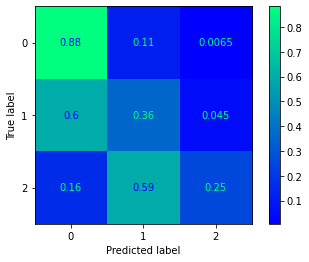

              precision    recall  f1-score   support

         0.0       0.62      0.88      0.73       154
         1.0       0.57      0.36      0.44       134
         2.0       0.53      0.25      0.34        32
		 R2 Score: -0.046688771395286155

SVM - Poly, Train Accuracy = 0.6849100860046912, C=0.5200597782391535
Test Accuracy = 0.6


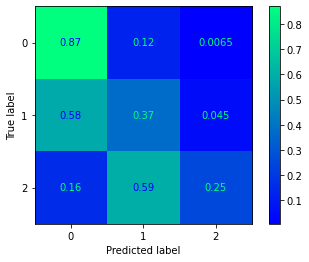

              precision    recall  f1-score   support

         0.0       0.62      0.87      0.72       154
         1.0       0.57      0.37      0.45       134
         2.0       0.53      0.25      0.34        32
		 R2 Score: -0.046688771395286155

SVM - Poly, Train Accuracy = 0.6888193901485535, C=0.5903836027749966
Test Accuracy = 0.60625


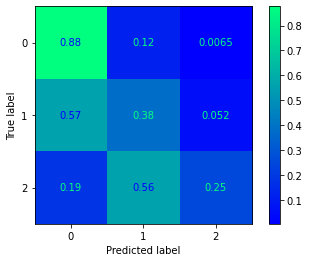

              precision    recall  f1-score   support

         0.0       0.62      0.88      0.73       154
         1.0       0.59      0.38      0.46       134
         2.0       0.50      0.25      0.33        32
		 R2 Score: -0.05385787256922647

SVM - Poly, Train Accuracy = 0.6927286942924159, C=0.670216796241643
Test Accuracy = 0.615625


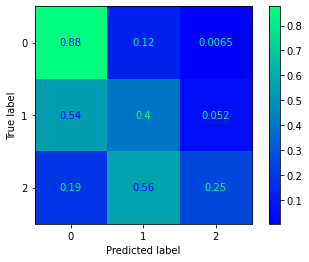

              precision    recall  f1-score   support

         0.0       0.63      0.88      0.73       154
         1.0       0.60      0.40      0.48       134
         2.0       0.50      0.25      0.33        32
		 R2 Score: -0.03235056904740552

SVM - Poly, Train Accuracy = 0.6950742767787333, C=0.7608452400321911
Test Accuracy = 0.6125


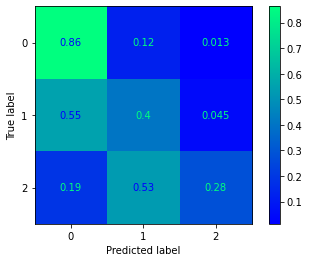

              precision    recall  f1-score   support

         0.0       0.62      0.86      0.72       154
         1.0       0.60      0.40      0.48       134
         2.0       0.53      0.28      0.37        32
		 R2 Score: -0.06102697374316679

SVM - Poly, Train Accuracy = 0.7005473025801408, C=0.8637286957382198
Test Accuracy = 0.615625


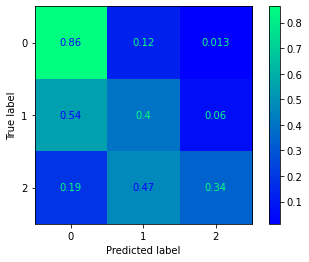

              precision    recall  f1-score   support

         0.0       0.63      0.86      0.73       154
         1.0       0.61      0.40      0.48       134
         2.0       0.52      0.34      0.42        32
		 R2 Score: -0.05385787256922647

SVM - Poly, Train Accuracy = 0.7021110242376857, C=0.9805243176786937
Test Accuracy = 0.61875


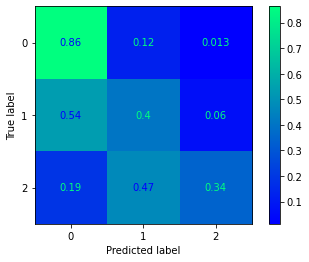

              precision    recall  f1-score   support

         0.0       0.63      0.86      0.73       154
         1.0       0.61      0.40      0.49       134
         2.0       0.52      0.34      0.42        32
		 R2 Score: -0.046688771395286155

SVM - Poly, Train Accuracy = 0.7083659108678655, C=1.1131133448536707
Test Accuracy = 0.621875


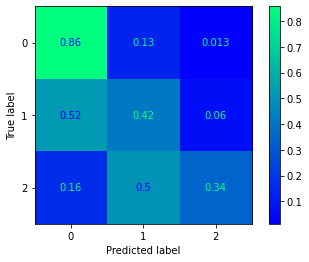

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.73       154
         1.0       0.61      0.42      0.50       134
         2.0       0.52      0.34      0.42        32
		 R2 Score: -0.018012366699524884

SVM - Poly, Train Accuracy = 0.7107114933541829, C=1.2636314022528294
Test Accuracy = 0.63125


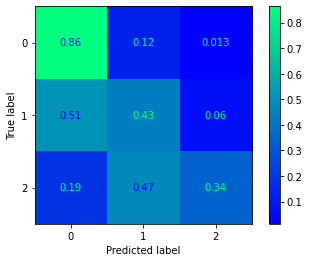

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.74       154
         1.0       0.63      0.43      0.51       134
         2.0       0.52      0.34      0.42        32
		 R2 Score: -0.018012366699524884

SVM - Poly, Train Accuracy = 0.7161845191555903, C=1.4345028995850928
Test Accuracy = 0.63125


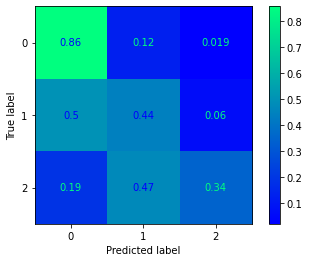

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.74       154
         1.0       0.63      0.44      0.52       134
         2.0       0.50      0.34      0.41        32
		 R2 Score: -0.03951967022134584

SVM - Poly, Train Accuracy = 0.7240031274433151, C=1.628480081493188
Test Accuracy = 0.6375


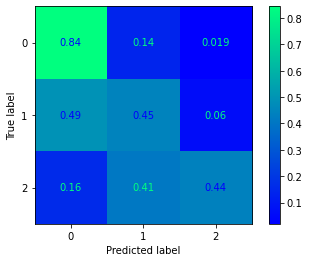

              precision    recall  f1-score   support

         0.0       0.65      0.84      0.73       154
         1.0       0.64      0.45      0.53       134
         2.0       0.56      0.44      0.49        32
		 R2 Score: -0.003674164351644249

SVM - Poly, Train Accuracy = 0.7263487099296325, C=1.8486873582389367
Test Accuracy = 0.640625


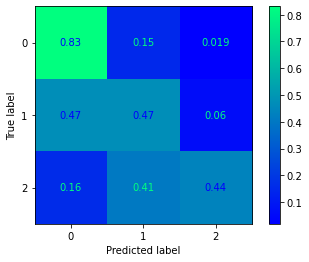

              precision    recall  f1-score   support

         0.0       0.65      0.83      0.73       154
         1.0       0.64      0.47      0.54       134
         2.0       0.56      0.44      0.49        32
		 R2 Score: 0.0034949368222959576

SVM - Poly, Train Accuracy = 0.727130570758405, C=2.0986716308981483
Test Accuracy = 0.6375


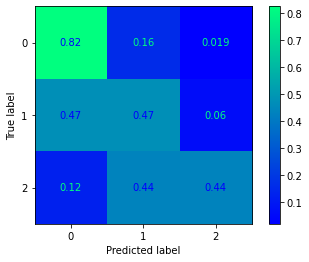

              precision    recall  f1-score   support

         0.0       0.65      0.82      0.73       154
         1.0       0.62      0.47      0.54       134
         2.0       0.56      0.44      0.49        32
		 R2 Score: 0.017833139170176593

SVM - Poly, Train Accuracy = 0.7294761532447225, C=2.382459421658163
Test Accuracy = 0.646875


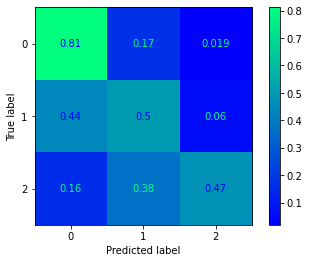

              precision    recall  f1-score   support

         0.0       0.66      0.81      0.73       154
         1.0       0.64      0.50      0.56       134
         2.0       0.58      0.47      0.52        32
		 R2 Score: 0.017833139170176593

SVM - Poly, Train Accuracy = 0.7302580140734949, C=2.7046217294215755
Test Accuracy = 0.64375


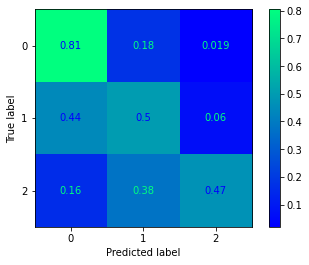

              precision    recall  f1-score   support

         0.0       0.66      0.81      0.73       154
         1.0       0.63      0.50      0.56       134
         2.0       0.58      0.47      0.52        32
		 R2 Score: 0.010664037996236275

SVM - Poly, Train Accuracy = 0.7380766223612197, C=3.070347655351973
Test Accuracy = 0.65


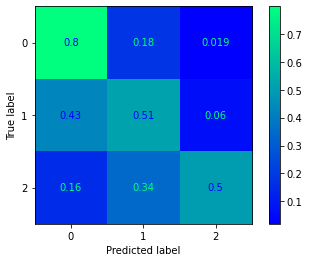

              precision    recall  f1-score   support

         0.0       0.66      0.80      0.73       154
         1.0       0.64      0.51      0.57       134
         2.0       0.59      0.50      0.54        32
		 R2 Score: 0.02500224034411691

SVM - Poly, Train Accuracy = 0.7419859265050821, C=3.485527984255849
Test Accuracy = 0.64375


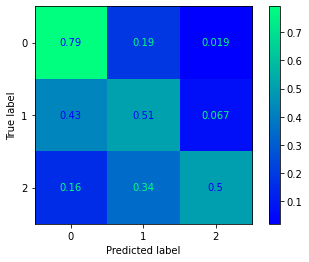

              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72       154
         1.0       0.63      0.51      0.56       134
         2.0       0.57      0.50      0.53        32
		 R2 Score: 0.010664037996236275

SVM - Poly, Train Accuracy = 0.746677091477717, C=3.9568500680545693
Test Accuracy = 0.653125


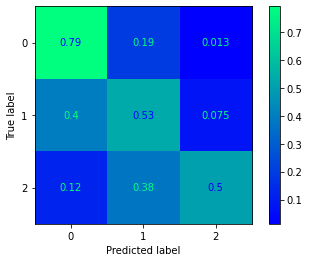

              precision    recall  f1-score   support

         0.0       0.68      0.79      0.73       154
         1.0       0.63      0.53      0.57       134
         2.0       0.57      0.50      0.53        32
		 R2 Score: 0.07518594856169913

SVM - Poly, Train Accuracy = 0.7474589523064894, C=4.49190553964412
Test Accuracy = 0.646875


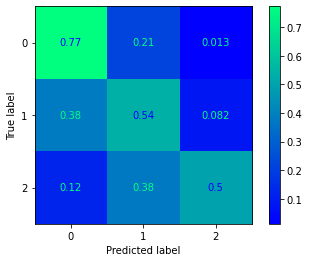

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.73       154
         1.0       0.62      0.54      0.57       134
         2.0       0.55      0.50      0.52        32
		 R2 Score: 0.0608477462138185

SVM - Poly, Train Accuracy = 0.7521501172791243, C=5.09931259210079
Test Accuracy = 0.640625


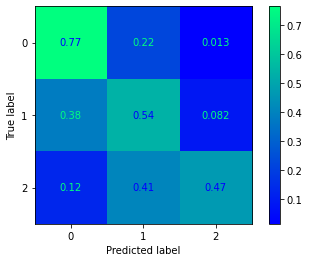

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72       154
         1.0       0.61      0.54      0.57       134
         2.0       0.54      0.47      0.50        32
		 R2 Score: 0.046509543865937863

SVM - Poly, Train Accuracy = 0.7552775605942142, C=5.788854792796425
Test Accuracy = 0.646875


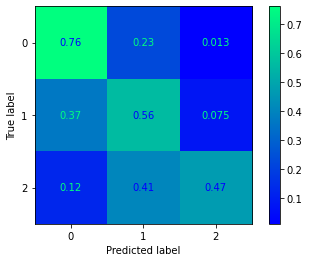

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       154
         1.0       0.61      0.56      0.58       134
         2.0       0.56      0.47      0.51        32
		 R2 Score: 0.0608477462138185

SVM - Poly, Train Accuracy = 0.7568412822517592, C=6.571638668316371
Test Accuracy = 0.646875


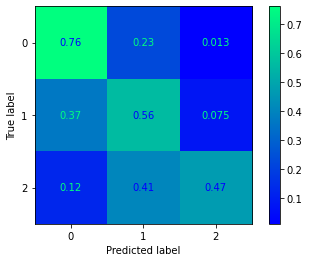

              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       154
         1.0       0.61      0.56      0.58       134
         2.0       0.56      0.47      0.51        32
		 R2 Score: 0.0608477462138185

SVM - Poly, Train Accuracy = 0.7591868647380766, C=7.460272598416461
Test Accuracy = 0.64375


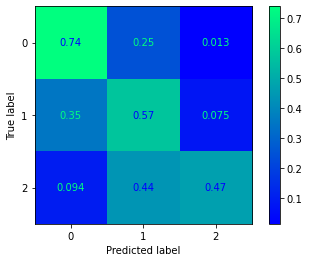

              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       154
         1.0       0.60      0.57      0.59       134
         2.0       0.56      0.47      0.51        32
		 R2 Score: 0.07518594856169913

SVM - Poly, Train Accuracy = 0.7591868647380766, C=8.46906990048226
Test Accuracy = 0.65


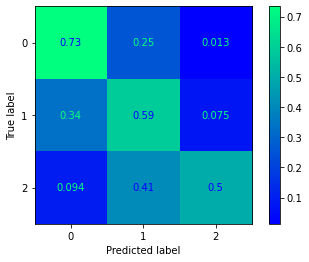

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.72       154
         1.0       0.60      0.59      0.60       134
         2.0       0.57      0.50      0.53        32
		 R2 Score: 0.08952415090957977

SVM - Poly, Train Accuracy = 0.7623143080531666, C=9.61427937559268
Test Accuracy = 0.65625


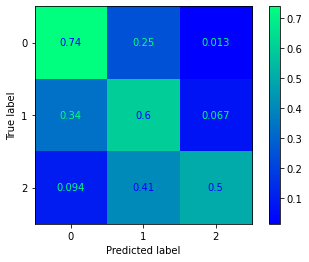

              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72       154
         1.0       0.61      0.60      0.60       134
         2.0       0.59      0.50      0.54        32
		 R2 Score: 0.1038623532574604

SVM - Poly, Train Accuracy = 0.764659890539484, C=10.914347029616938
Test Accuracy = 0.65


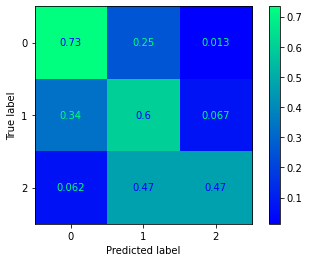

              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       154
         1.0       0.60      0.60      0.60       134
         2.0       0.58      0.47      0.52        32
		 R2 Score: 0.11103145443140072

SVM - Poly, Train Accuracy = 0.766223612197029, C=12.39021318491327
Test Accuracy = 0.65625


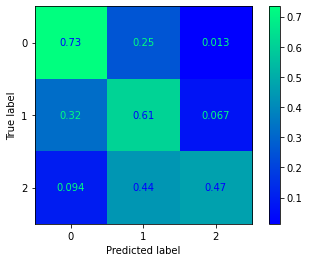

              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       154
         1.0       0.61      0.61      0.61       134
         2.0       0.58      0.47      0.52        32
		 R2 Score: 0.1038623532574604

SVM - Poly, Train Accuracy = 0.7724784988272088, C=14.065649768237806
Test Accuracy = 0.65625


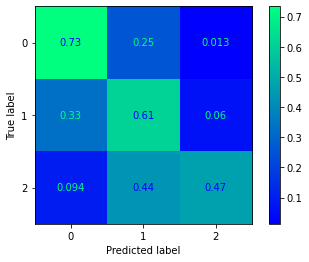

              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       154
         1.0       0.61      0.61      0.61       134
         2.0       0.60      0.47      0.53        32
		 R2 Score: 0.1038623532574604

SVM - Poly, Train Accuracy = 0.7740422204847537, C=15.967643207594522
Test Accuracy = 0.65


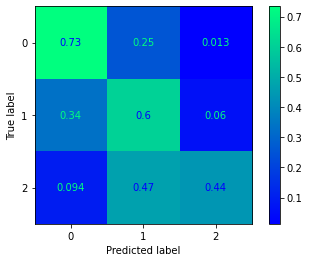

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.72       154
         1.0       0.60      0.60      0.60       134
         2.0       0.58      0.44      0.50        32
		 R2 Score: 0.08952415090957977

SVM - Poly, Train Accuracy = 0.7740422204847537, C=18.126829105384598
Test Accuracy = 0.646875


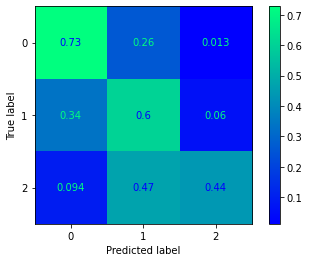

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71       154
         1.0       0.60      0.60      0.60       134
         2.0       0.58      0.44      0.50        32
		 R2 Score: 0.08235504973563945

SVM - Poly, Train Accuracy = 0.7771696637998436, C=20.57798568918039
Test Accuracy = 0.64375


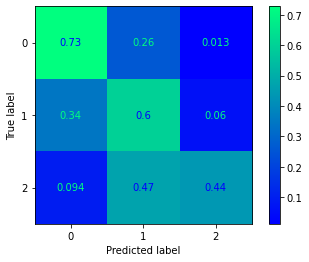

              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71       154
         1.0       0.59      0.60      0.59       134
         2.0       0.58      0.44      0.50        32
		 R2 Score: 0.07518594856169913

SVM - Poly, Train Accuracy = 0.7818608287724785, C=23.360593988185475
Test Accuracy = 0.640625


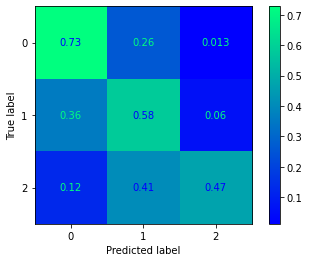

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       154
         1.0       0.60      0.58      0.59       134
         2.0       0.60      0.47      0.53        32
		 R2 Score: 0.046509543865937863

SVM - Poly, Train Accuracy = 0.7818608287724785, C=26.5194737582006
Test Accuracy = 0.646875


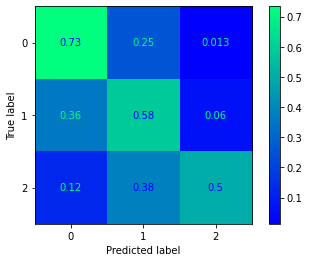

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.71       154
         1.0       0.60      0.58      0.59       134
         2.0       0.62      0.50      0.55        32
		 R2 Score: 0.0608477462138185

SVM - Poly, Train Accuracy = 0.7865519937451134, C=30.105505398003714
Test Accuracy = 0.64375


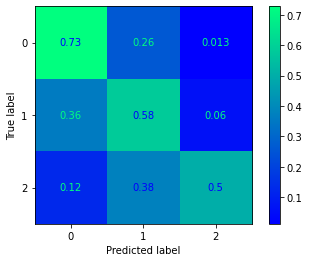

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       154
         1.0       0.60      0.58      0.59       134
         2.0       0.62      0.50      0.55        32
		 R2 Score: 0.05367864503987818

SVM - Poly, Train Accuracy = 0.7881157154026583, C=34.176449485124586
Test Accuracy = 0.64375


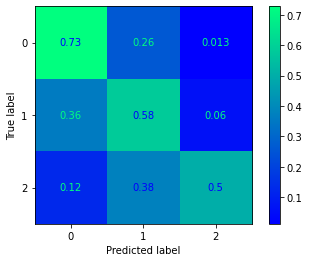

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       154
         1.0       0.60      0.58      0.59       134
         2.0       0.62      0.50      0.55        32
		 R2 Score: 0.05367864503987818

SVM - Poly, Train Accuracy = 0.7896794370602033, C=38.797877131361005
Test Accuracy = 0.640625


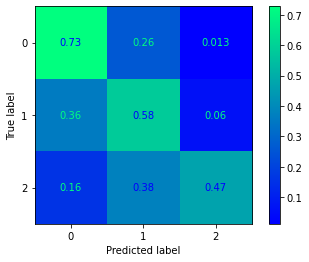

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       154
         1.0       0.60      0.58      0.59       134
         2.0       0.60      0.47      0.53        32
		 R2 Score: 0.02500224034411691

SVM - Poly, Train Accuracy = 0.7982799061767005, C=44.04422614336694
Test Accuracy = 0.646875


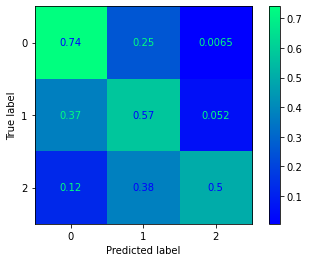

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71       154
         1.0       0.60      0.57      0.59       134
         2.0       0.67      0.50      0.57        32
		 R2 Score: 0.08235504973563945

SVM - Poly, Train Accuracy = 0.7982799061767005, C=50.0
Test Accuracy = 0.653125


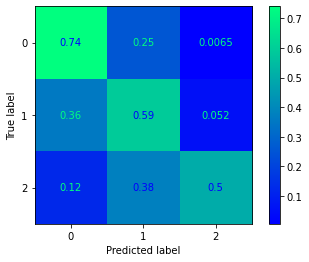

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.71       154
         1.0       0.61      0.59      0.60       134
         2.0       0.67      0.50      0.57        32
		 R2 Score: 0.09669325208352009



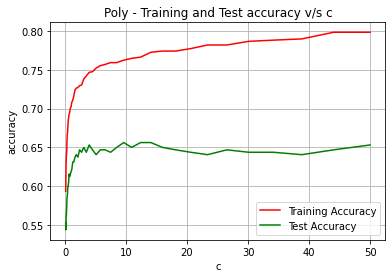

In [864]:
num_of_different_c = 50
c_svm_linear = np.geomspace(0.06, 0.4, num=num_of_different_c)
c_svm_rbf = np.geomspace(1, 23, num=num_of_different_c)
c_svm_poly = np.geomspace(0.1, 50, num=num_of_different_c)

train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train White Wines Data

In [865]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

Original y hist: (array([  0,   0,   0,  10,  53, 681, 638, 217]), array([0, 1, 2, 3, 4, 5, 6, 7, 8]))
Current y hist: (array([744, 638, 217]), array([-0.5,  0.5,  1.5,  2.5]))
y min: 0.0, y max: 2.0
The shape of the wines dataset: (1599, 12)
y[:10]:
[0. 1. 1. 1. 0. 0. 0. 1. 1. 2.]
X[:10, :]:
[[7.50000000e+00 5.00000000e-01 3.60000000e-01 6.10000000e+00
  7.10000000e-02 1.70000000e+01 1.02000000e+02 9.97800000e-01
  3.35000000e+00 8.00000000e-01 1.05000000e+01]
 [9.40000000e+00 3.30000000e-01 5.90000000e-01 2.80000000e+00
  7.90000000e-02 9.00000000e+00 3.00000000e+01 9.97600000e-01
  3.12000000e+00 5.40000000e-01 1.20000000e+01]
 [9.00000000e+00 8.00000000e-01 1.20000000e-01 2.40000000e+00
  8.30000000e-02 8.00000000e+00 2.80000000e+01 9.98360000e-01
  3.33000000e+00 6.50000000e-01 1.04000000e+01]
 [7.40000000e+00 7.85000000e-01 1.90000000e-01 5.20000000e+00
  9.40000000e-02 1.90000000e+01 9.80000000e+01 9.97130000e-01
  3.16000000e+00 5.20000000e-01 9.56666667e+00]
 [8.40000000e+00 6

SVM - Linear, Train Accuracy = 0.6309616888193902, C=0.06
Test Accuracy = 0.628125


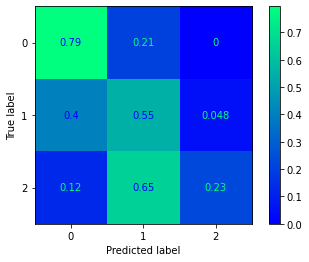

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.55      0.54       124
         2.0       0.60      0.23      0.33        40
		 R2 Score: 0.12958752841831755

SVM - Linear, Train Accuracy = 0.6317435496481626, C=0.062368559648186196
Test Accuracy = 0.63125


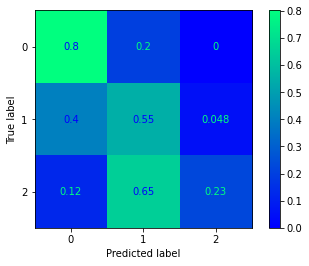

              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74       156
         1.0       0.54      0.55      0.55       124
         2.0       0.60      0.23      0.33        40
		 R2 Score: 0.13608314387788234

SVM - Linear, Train Accuracy = 0.6325254104769351, C=0.064830620543156
Test Accuracy = 0.628125


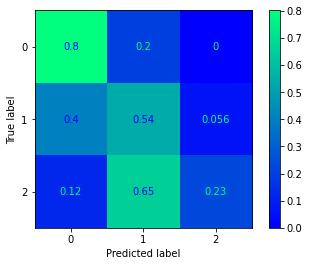

              precision    recall  f1-score   support

         0.0       0.69      0.80      0.74       156
         1.0       0.54      0.54      0.54       124
         2.0       0.56      0.23      0.32        40
		 R2 Score: 0.12958752841831755

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.06738987373957916
Test Accuracy = 0.625


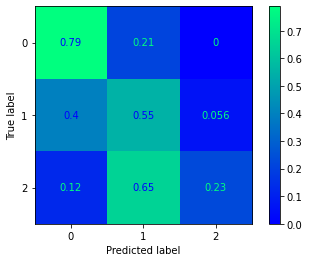

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.55      0.54       124
         2.0       0.56      0.23      0.32        40
		 R2 Score: 0.12309191295875277

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.070050156000178
Test Accuracy = 0.625


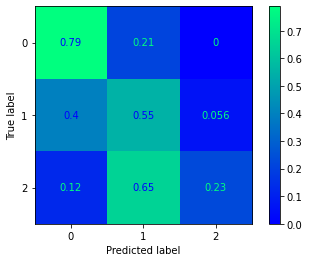

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.55      0.54       124
         2.0       0.56      0.23      0.32        40
		 R2 Score: 0.12309191295875277

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.0728154555476975
Test Accuracy = 0.625


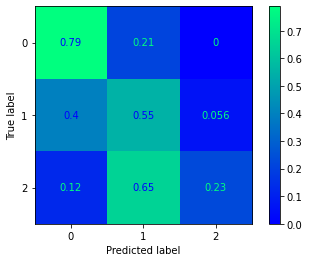

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.55      0.54       124
         2.0       0.56      0.23      0.32        40
		 R2 Score: 0.12309191295875277

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.07568991804394033
Test Accuracy = 0.625


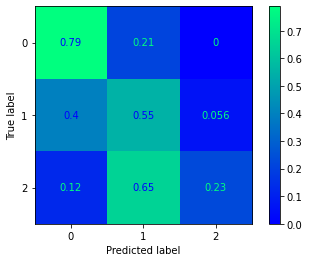

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.55      0.54       124
         2.0       0.56      0.23      0.32        40
		 R2 Score: 0.12309191295875277

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.07867785280483029
Test Accuracy = 0.625


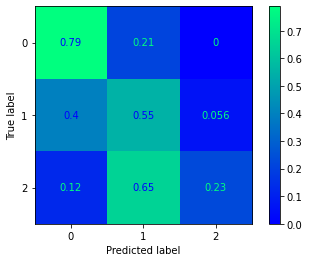

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.55      0.54       124
         2.0       0.56      0.23      0.32        40
		 R2 Score: 0.12309191295875277

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.08178373926082119
Test Accuracy = 0.621875


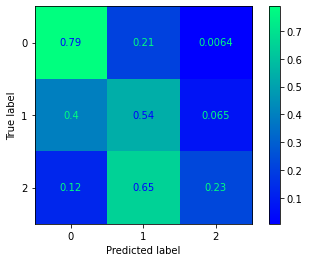

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.54      0.54       124
         2.0       0.50      0.23      0.31        40
		 R2 Score: 0.09710945112049363

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.08501223367233723
Test Accuracy = 0.628125


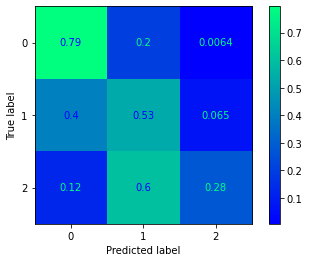

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.55      0.53      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.1101006820396232

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.08836817611031181
Test Accuracy = 0.628125


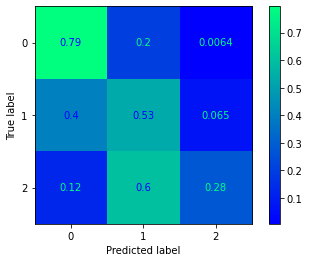

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.55      0.53      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.1101006820396232

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.09185659771229007
Test Accuracy = 0.63125


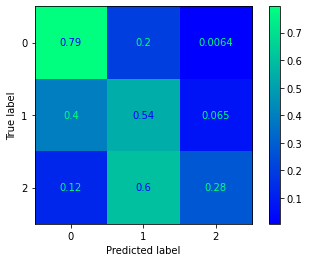

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       156
         1.0       0.55      0.54      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.11659629749918798

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.09548272822497346
Test Accuracy = 0.63125


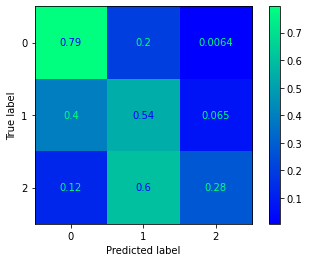

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       156
         1.0       0.55      0.54      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.11659629749918798

SVM - Linear, Train Accuracy = 0.6379984362783424, C=0.09925200384451348
Test Accuracy = 0.628125


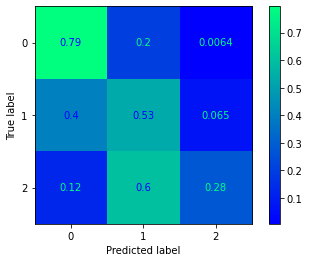

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.55      0.53      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.1101006820396232

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.10317007536630908
Test Accuracy = 0.628125


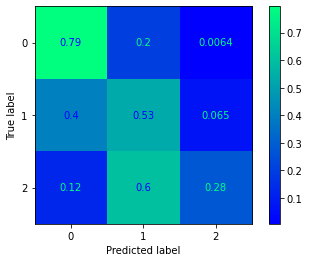

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.55      0.53      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.1101006820396232

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.10724281665652523
Test Accuracy = 0.628125


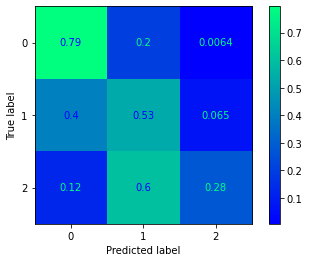

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.55      0.53      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.1101006820396232

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.11147633345803316
Test Accuracy = 0.628125


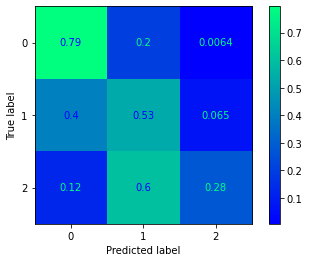

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.55      0.53      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.1101006820396232

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.11587697254397394
Test Accuracy = 0.628125


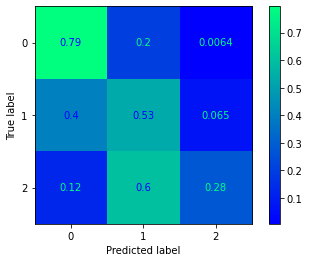

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.55      0.53      0.54       124
         2.0       0.55      0.28      0.37        40
		 R2 Score: 0.1101006820396232

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.12045133123266785
Test Accuracy = 0.625


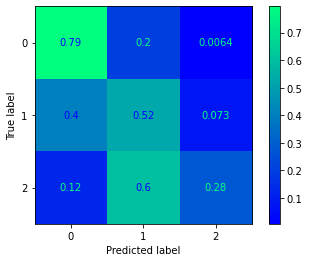

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.12520626727813464
Test Accuracy = 0.625


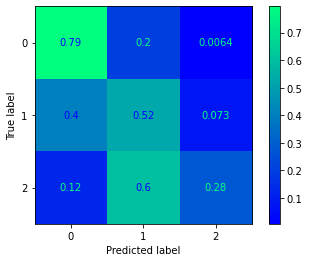

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.63408913213448, C=0.1301489091510514
Test Accuracy = 0.625


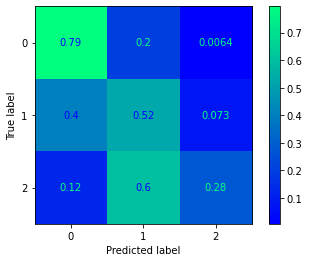

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.1352866667255619
Test Accuracy = 0.625


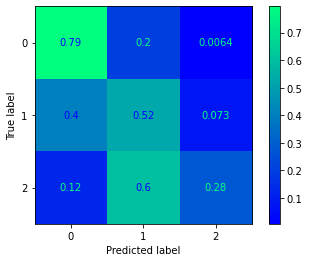

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.14062724238795823
Test Accuracy = 0.625


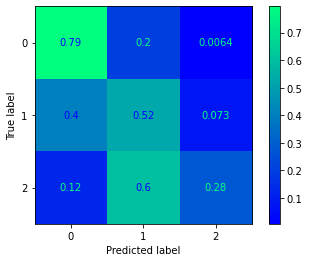

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.14617864258388852
Test Accuracy = 0.625


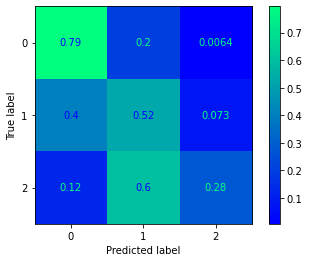

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.15194918982140238
Test Accuracy = 0.625


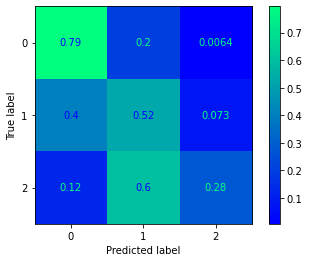

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.15794753514782836
Test Accuracy = 0.625


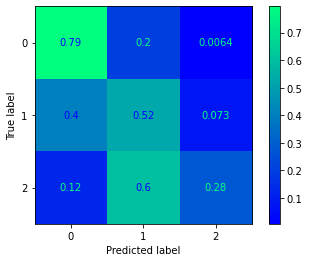

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6395621579358874, C=0.16418267111918863
Test Accuracy = 0.625


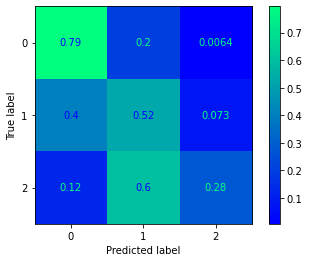

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6387802971071149, C=0.17066394528159423
Test Accuracy = 0.625


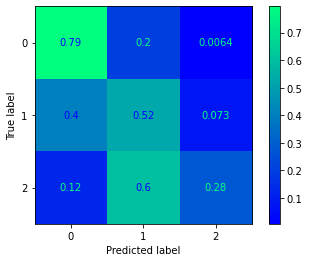

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.17740107418483161
Test Accuracy = 0.625


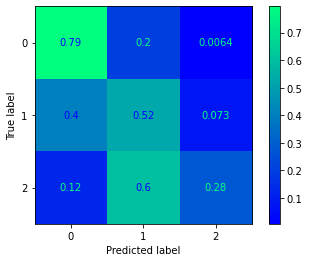

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.52      0.28      0.36        40
		 R2 Score: 0.10360506658005841

SVM - Linear, Train Accuracy = 0.6348709929632526, C=0.18440415794914958
Test Accuracy = 0.61875


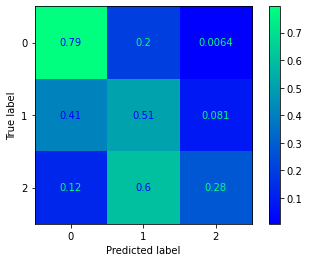

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.1916836954070847
Test Accuracy = 0.61875


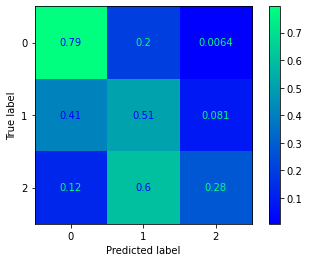

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.19925059984302526
Test Accuracy = 0.61875


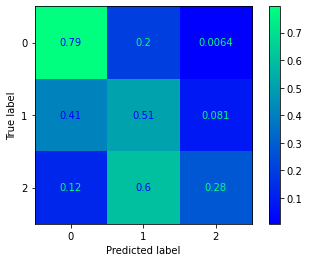

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.20711621535411
Test Accuracy = 0.61875


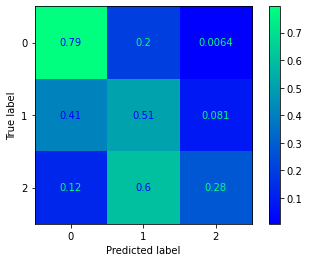

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.21529233385698981
Test Accuracy = 0.61875


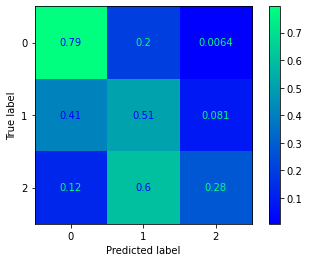

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.2237912127659481
Test Accuracy = 0.61875


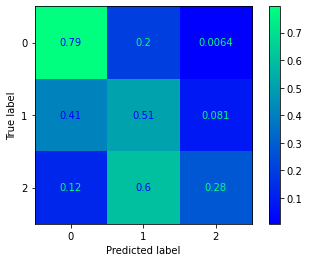

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.23262559336888272
Test Accuracy = 0.61875


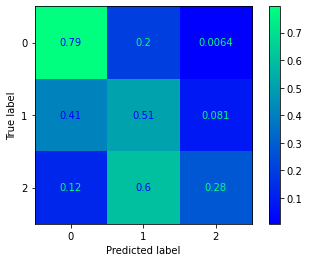

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.24180871992869776
Test Accuracy = 0.621875


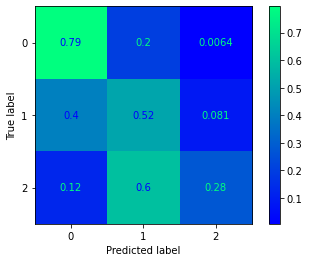

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09710945112049363

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.2513543595387423
Test Accuracy = 0.621875


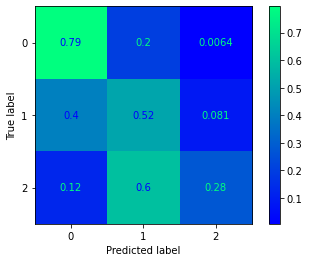

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09710945112049363

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.2612768227620615
Test Accuracy = 0.621875


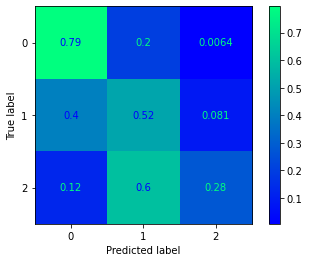

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09710945112049363

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.2715909850854034
Test Accuracy = 0.621875


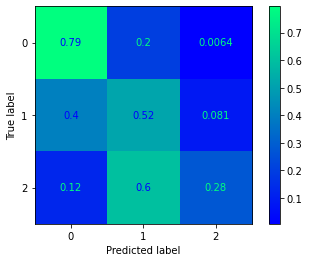

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.54      0.52      0.53       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09710945112049363

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.28231230922014383
Test Accuracy = 0.61875


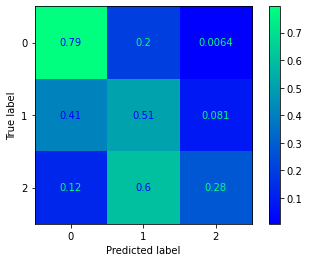

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.63721657544957, C=0.2934568682835621
Test Accuracy = 0.61875


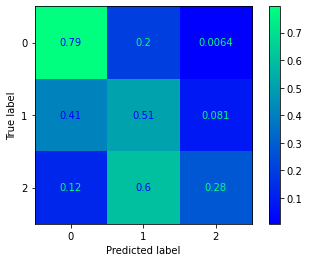

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.305041369895221
Test Accuracy = 0.61875


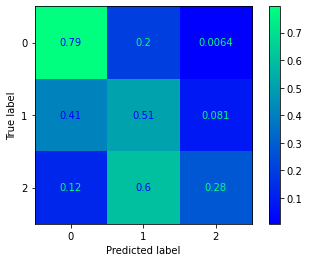

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.31708318122457535
Test Accuracy = 0.61875


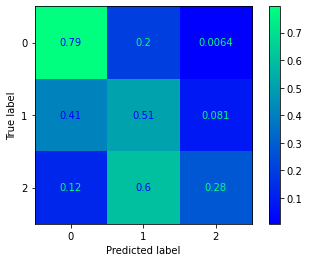

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.32960035502735935
Test Accuracy = 0.61875


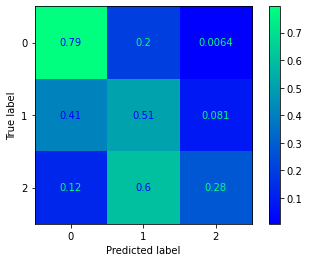

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.3426116567097868
Test Accuracy = 0.61875


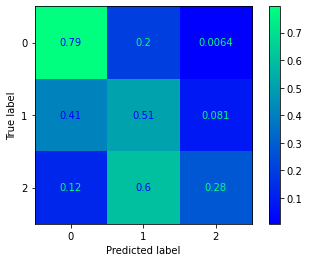

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.3561365924611372
Test Accuracy = 0.61875


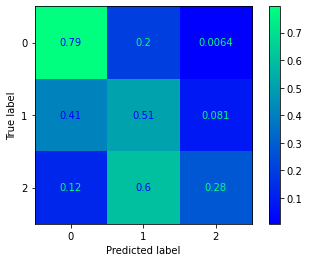

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6364347146207975, C=0.3701954384969036
Test Accuracy = 0.61875


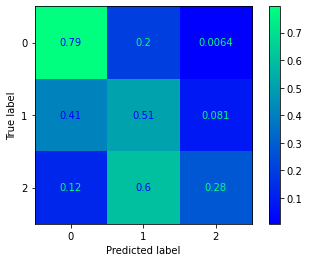

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.38480927145634286
Test Accuracy = 0.61875


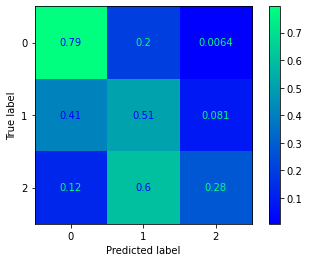

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884

SVM - Linear, Train Accuracy = 0.6356528537920251, C=0.4
Test Accuracy = 0.61875


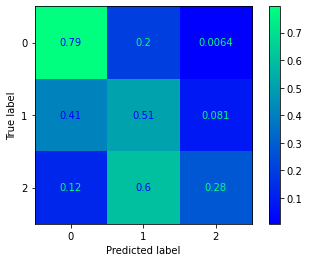

              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74       156
         1.0       0.53      0.51      0.52       124
         2.0       0.50      0.28      0.35        40
		 R2 Score: 0.09061383566092884



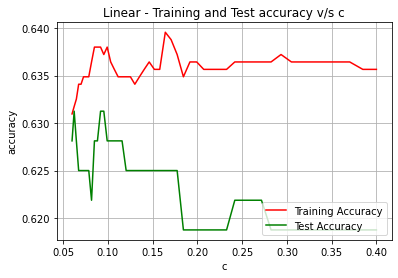

SVM - RBF, Train Accuracy = 0.7099296325254105, C=1.0
Test Accuracy = 0.64375


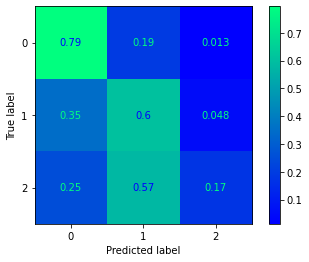

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74       156
         1.0       0.59      0.60      0.60       124
         2.0       0.47      0.17      0.25        40
		 R2 Score: 0.02565768106528088

SVM - RBF, Train Accuracy = 0.7114933541829555, C=1.0660813944804757
Test Accuracy = 0.653125


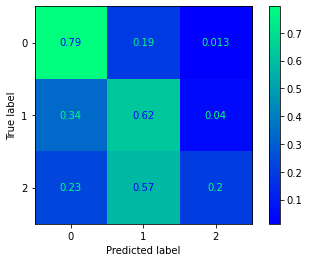

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.59      0.62      0.61       124
         2.0       0.53      0.20      0.29        40
		 R2 Score: 0.06463137382266959

SVM - RBF, Train Accuracy = 0.7138389366692729, C=1.1365295396574355
Test Accuracy = 0.65625


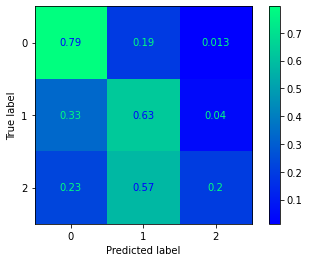

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.60      0.63      0.61       124
         2.0       0.53      0.20      0.29        40
		 R2 Score: 0.07112698928223438

SVM - RBF, Train Accuracy = 0.7154026583268178, C=1.211632996506252
Test Accuracy = 0.653125


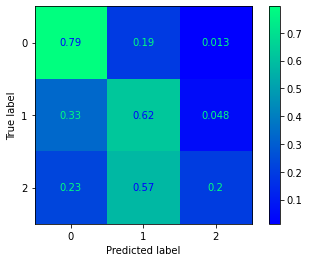

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.59      0.62      0.61       124
         2.0       0.50      0.20      0.29        40
		 R2 Score: 0.06463137382266959

SVM - RBF, Train Accuracy = 0.7169663799843627, C=1.2916993945139426
Test Accuracy = 0.65625


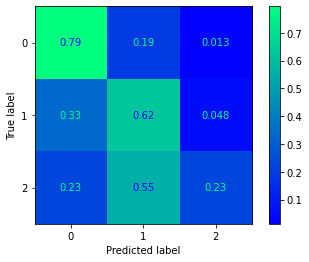

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.60      0.62      0.61       124
         2.0       0.53      0.23      0.32        40
		 R2 Score: 0.07112698928223438

SVM - RBF, Train Accuracy = 0.7185301016419078, C=1.3770566917530098
Test Accuracy = 0.65625


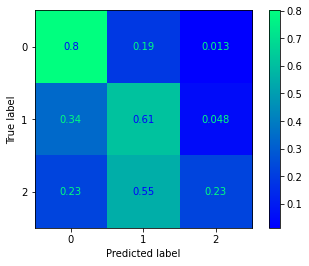

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.75       156
         1.0       0.60      0.61      0.61       124
         2.0       0.53      0.23      0.32        40
		 R2 Score: 0.07112698928223438

SVM - RBF, Train Accuracy = 0.7200938232994527, C=1.4680545182227194
Test Accuracy = 0.659375


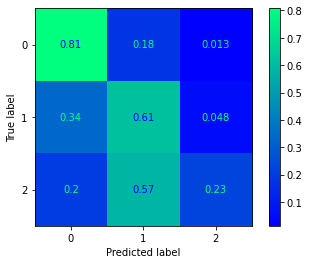

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       156
         1.0       0.60      0.61      0.61       124
         2.0       0.53      0.23      0.32        40
		 R2 Score: 0.09710945112049363

SVM - RBF, Train Accuracy = 0.7247849882720876, C=1.5650656079602396
Test Accuracy = 0.659375


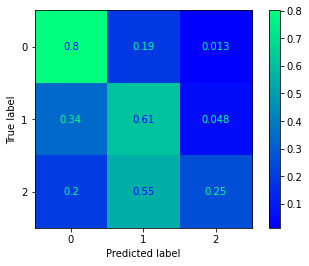

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.76       156
         1.0       0.60      0.61      0.61       124
         2.0       0.56      0.25      0.34        40
		 R2 Score: 0.09710945112049363

SVM - RBF, Train Accuracy = 0.7279124315871774, C=1.6684873257876855
Test Accuracy = 0.65625


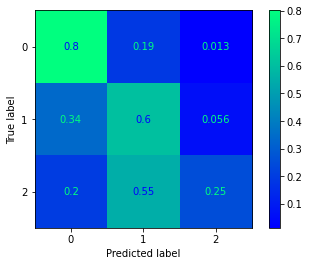

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.76       156
         1.0       0.60      0.60      0.60       124
         2.0       0.53      0.25      0.34        40
		 R2 Score: 0.09061383566092884

SVM - RBF, Train Accuracy = 0.7310398749022674, C=1.7787432949487358
Test Accuracy = 0.65625


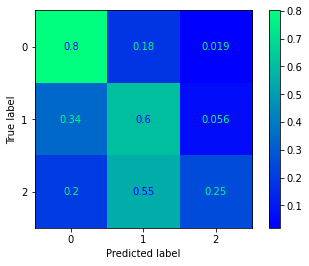

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.76       156
         1.0       0.60      0.60      0.60       124
         2.0       0.50      0.25      0.33        40
		 R2 Score: 0.07112698928223438

SVM - RBF, Train Accuracy = 0.7318217357310399, C=1.896285132301744
Test Accuracy = 0.65625


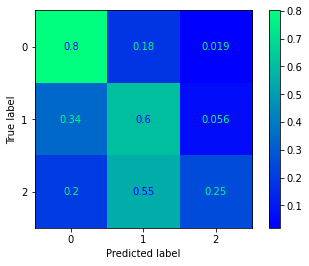

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.76       156
         1.0       0.60      0.60      0.60       124
         2.0       0.50      0.25      0.33        40
		 R2 Score: 0.07112698928223438

SVM - RBF, Train Accuracy = 0.7349491790461298, C=2.021594298176837
Test Accuracy = 0.659375


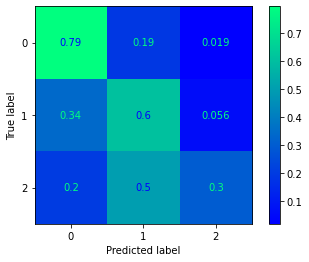

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.60      0.60      0.60       124
         2.0       0.55      0.30      0.39        40
		 R2 Score: 0.07762260474179927

SVM - RBF, Train Accuracy = 0.7372947615324472, C=2.155184068474141
Test Accuracy = 0.659375


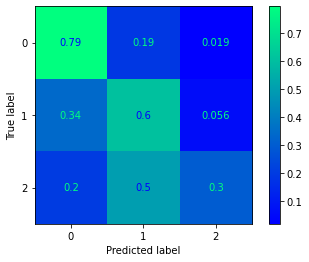

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.60      0.60      0.60       124
         2.0       0.55      0.30      0.39        40
		 R2 Score: 0.07762260474179927

SVM - RBF, Train Accuracy = 0.7388584831899921, C=2.297601637081017
Test Accuracy = 0.65


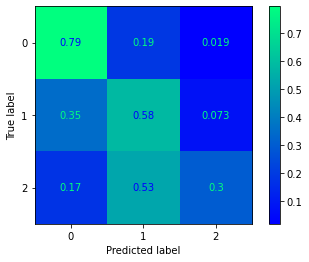

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.59      0.58      0.59       124
         2.0       0.50      0.30      0.37        40
		 R2 Score: 0.07762260474179927

SVM - RBF, Train Accuracy = 0.7427677873338546, C=2.4494303572199545
Test Accuracy = 0.65


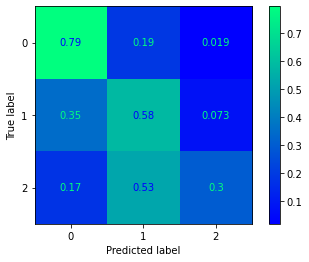

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.59      0.58      0.59       124
         2.0       0.50      0.30      0.37        40
		 R2 Score: 0.07762260474179927

SVM - RBF, Train Accuracy = 0.743549648162627, C=2.6112921309078585
Test Accuracy = 0.65


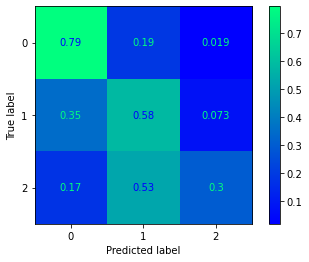

              precision    recall  f1-score   support

         0.0       0.71      0.79      0.75       156
         1.0       0.59      0.58      0.59       124
         2.0       0.50      0.30      0.37        40
		 R2 Score: 0.07762260474179927

SVM - RBF, Train Accuracy = 0.7458952306489445, C=2.7838499563141426
Test Accuracy = 0.65625


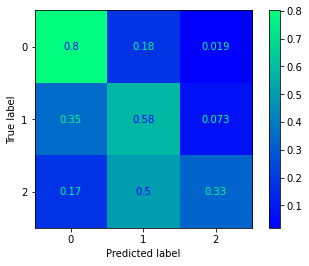

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.76       156
         1.0       0.60      0.58      0.59       124
         2.0       0.52      0.33      0.40        40
		 R2 Score: 0.09061383566092884

SVM - RBF, Train Accuracy = 0.7513682564503519, C=2.967810643451793
Test Accuracy = 0.653125


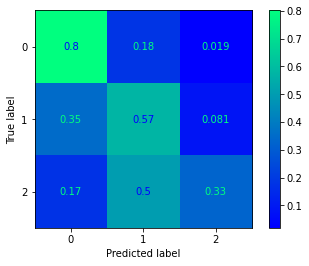

              precision    recall  f1-score   support

         0.0       0.71      0.80      0.76       156
         1.0       0.60      0.57      0.58       124
         2.0       0.50      0.33      0.39        40
		 R2 Score: 0.08411822020136406

SVM - RBF, Train Accuracy = 0.7576231430805317, C=3.163927709325085
Test Accuracy = 0.659375


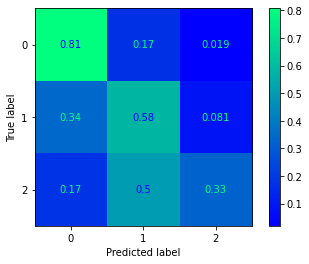

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       156
         1.0       0.61      0.58      0.59       124
         2.0       0.50      0.33      0.39        40
		 R2 Score: 0.09710945112049363

SVM - RBF, Train Accuracy = 0.7654417513682564, C=3.3730044643927033
Test Accuracy = 0.659375


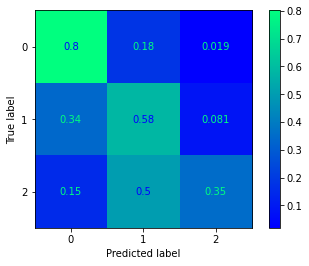

              precision    recall  f1-score   support

         0.0       0.72      0.80      0.76       156
         1.0       0.60      0.58      0.59       124
         2.0       0.52      0.35      0.42        40
		 R2 Score: 0.11659629749918798

SVM - RBF, Train Accuracy = 0.7677873338545739, C=3.595897302988643
Test Accuracy = 0.65625


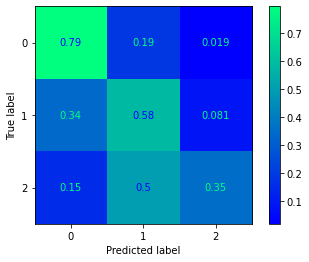

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76       156
         1.0       0.60      0.58      0.59       124
         2.0       0.52      0.35      0.42        40
		 R2 Score: 0.1101006820396232

SVM - RBF, Train Accuracy = 0.766223612197029, C=3.8335192111787144
Test Accuracy = 0.65625


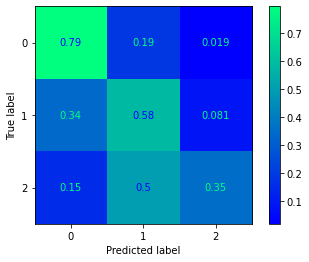

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76       156
         1.0       0.60      0.58      0.59       124
         2.0       0.52      0.35      0.42        40
		 R2 Score: 0.1101006820396232

SVM - RBF, Train Accuracy = 0.7685691946833464, C=4.086843506421097
Test Accuracy = 0.653125


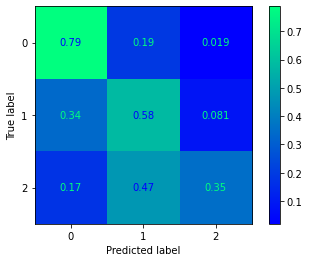

              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75       156
         1.0       0.60      0.58      0.59       124
         2.0       0.52      0.35      0.42        40
		 R2 Score: 0.08411822020136406



In [ ]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)

# Train All Wines Data

In [ ]:
X_train, y_train, X_test, y_test = transform_and_split_data(data_red)

In [ ]:
train_and_plot(X_train, y_train, X_test, y_test, c_svm_linear, c_svm_rbf, c_svm_poly)